## Checking and installing basic dependencies and hardware acceleration
We will be creating a **dog detection computer vision model** for Real-time dog detection application

In [ ]:
!nvidia-smi

Fri Feb  3 17:44:31 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P0    27W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.11

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.11 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.6/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

Now we will be importing our dataset of dogs from **roboflow**. It gives us a clean code to use for Yolov8

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="mGkd7R0TEdYfzgiiywuO")
project = rf.workspace("majalberkane").project("doggdetect")
dataset = project.version(5).download("yolov8")

mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
loading Roboflow workspace...
loading Roboflow project...

Extracting Dataset Version Zip to doggDetect-5 in yolov8:: 100%|██████████| 5458/5458 [00:01<00:00, 2848.35it/s]


In [ ]:
!set 'PYTORCH_CUDA_ALLOC_CONF=max_split_size_mb:50'

## Now we will be training our model:

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8x.pt data={dataset.location}/data.yaml epochs=40 imgsz=640

/content
100% 131M/131M [00:01<00:00, 104MB/s]

Ultralytics YOLOv8.0.11 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/content/datasets/doggDetect-5/data.yaml, epochs=40, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, s

Checking the weights

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    train_batch2.jpg
confusion_matrix.png				    train_batch4170.jpg
events.out.tfevents.1675446985.ccbfca3907b5.5789.0  train_batch4171.jpg
F1_curve.png					    train_batch4172.jpg
P_curve.png					    val_batch0_labels.jpg
PR_curve.png					    val_batch0_pred.jpg
predictions.json				    val_batch1_labels.jpg
R_curve.png					    val_batch1_pred.jpg
results.csv					    val_batch2_labels.jpg
results.png					    val_batch2_pred.jpg
train_batch0.jpg				    weights
train_batch1.jpg


/content


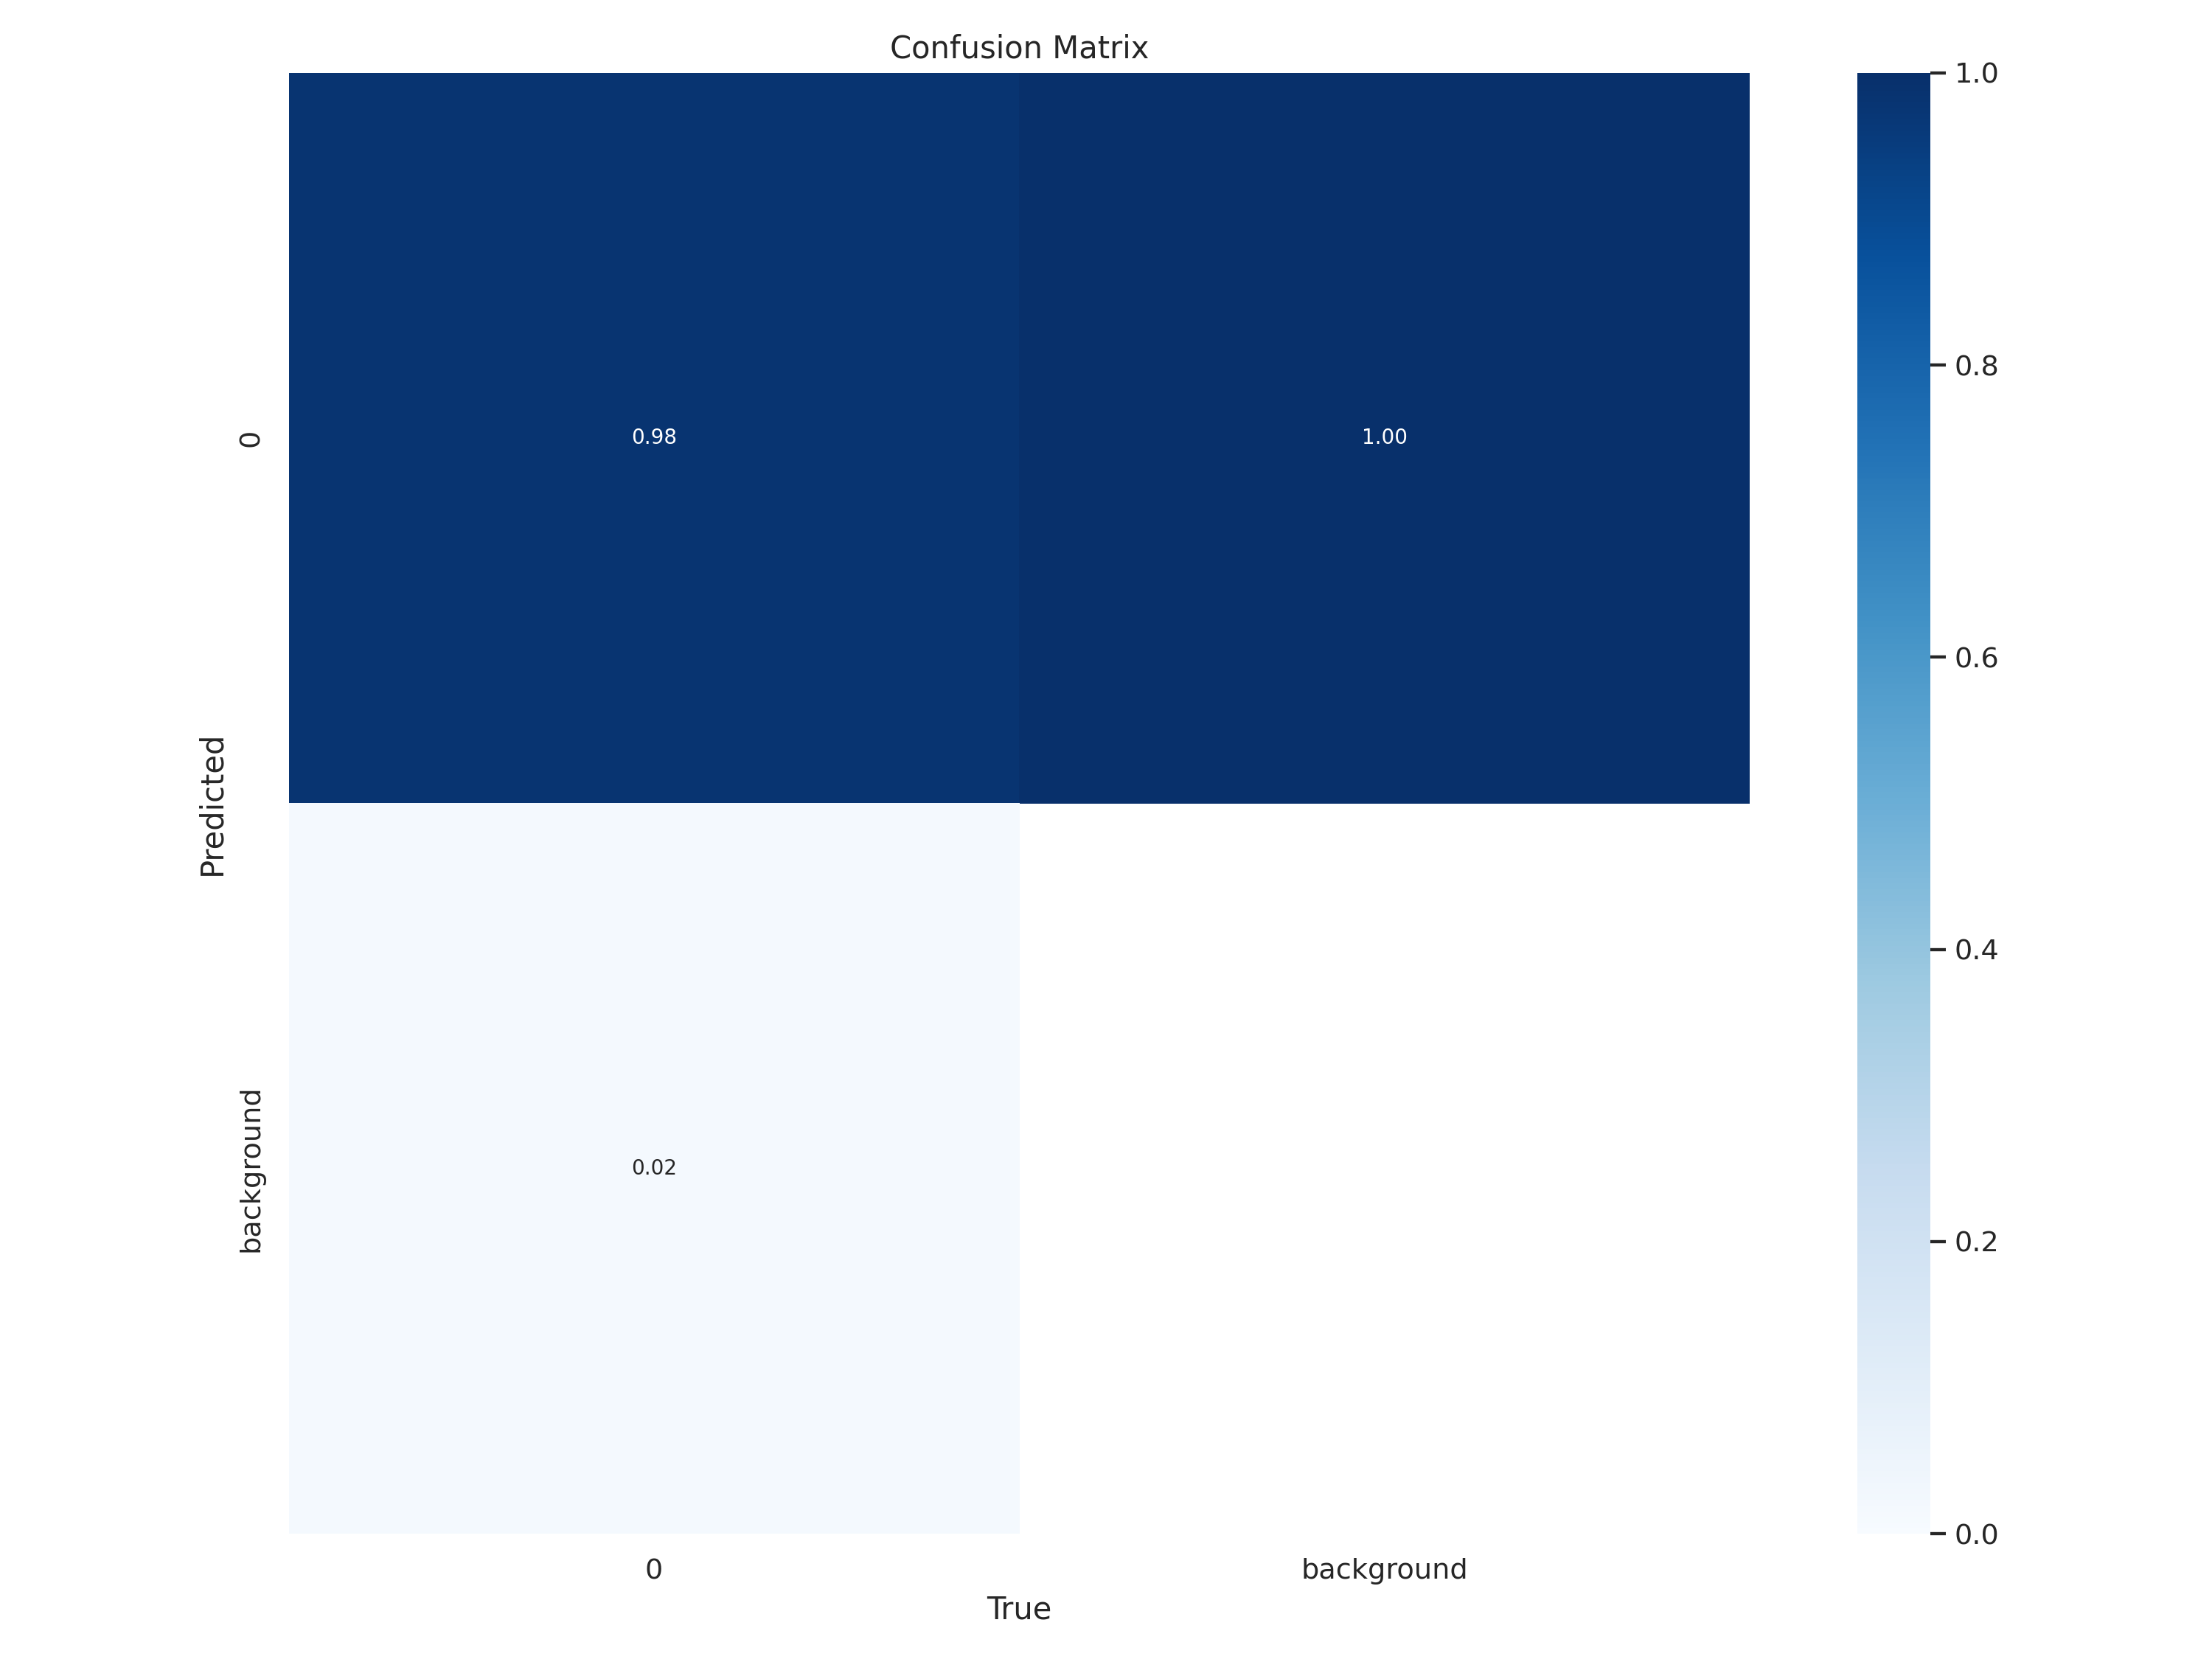

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


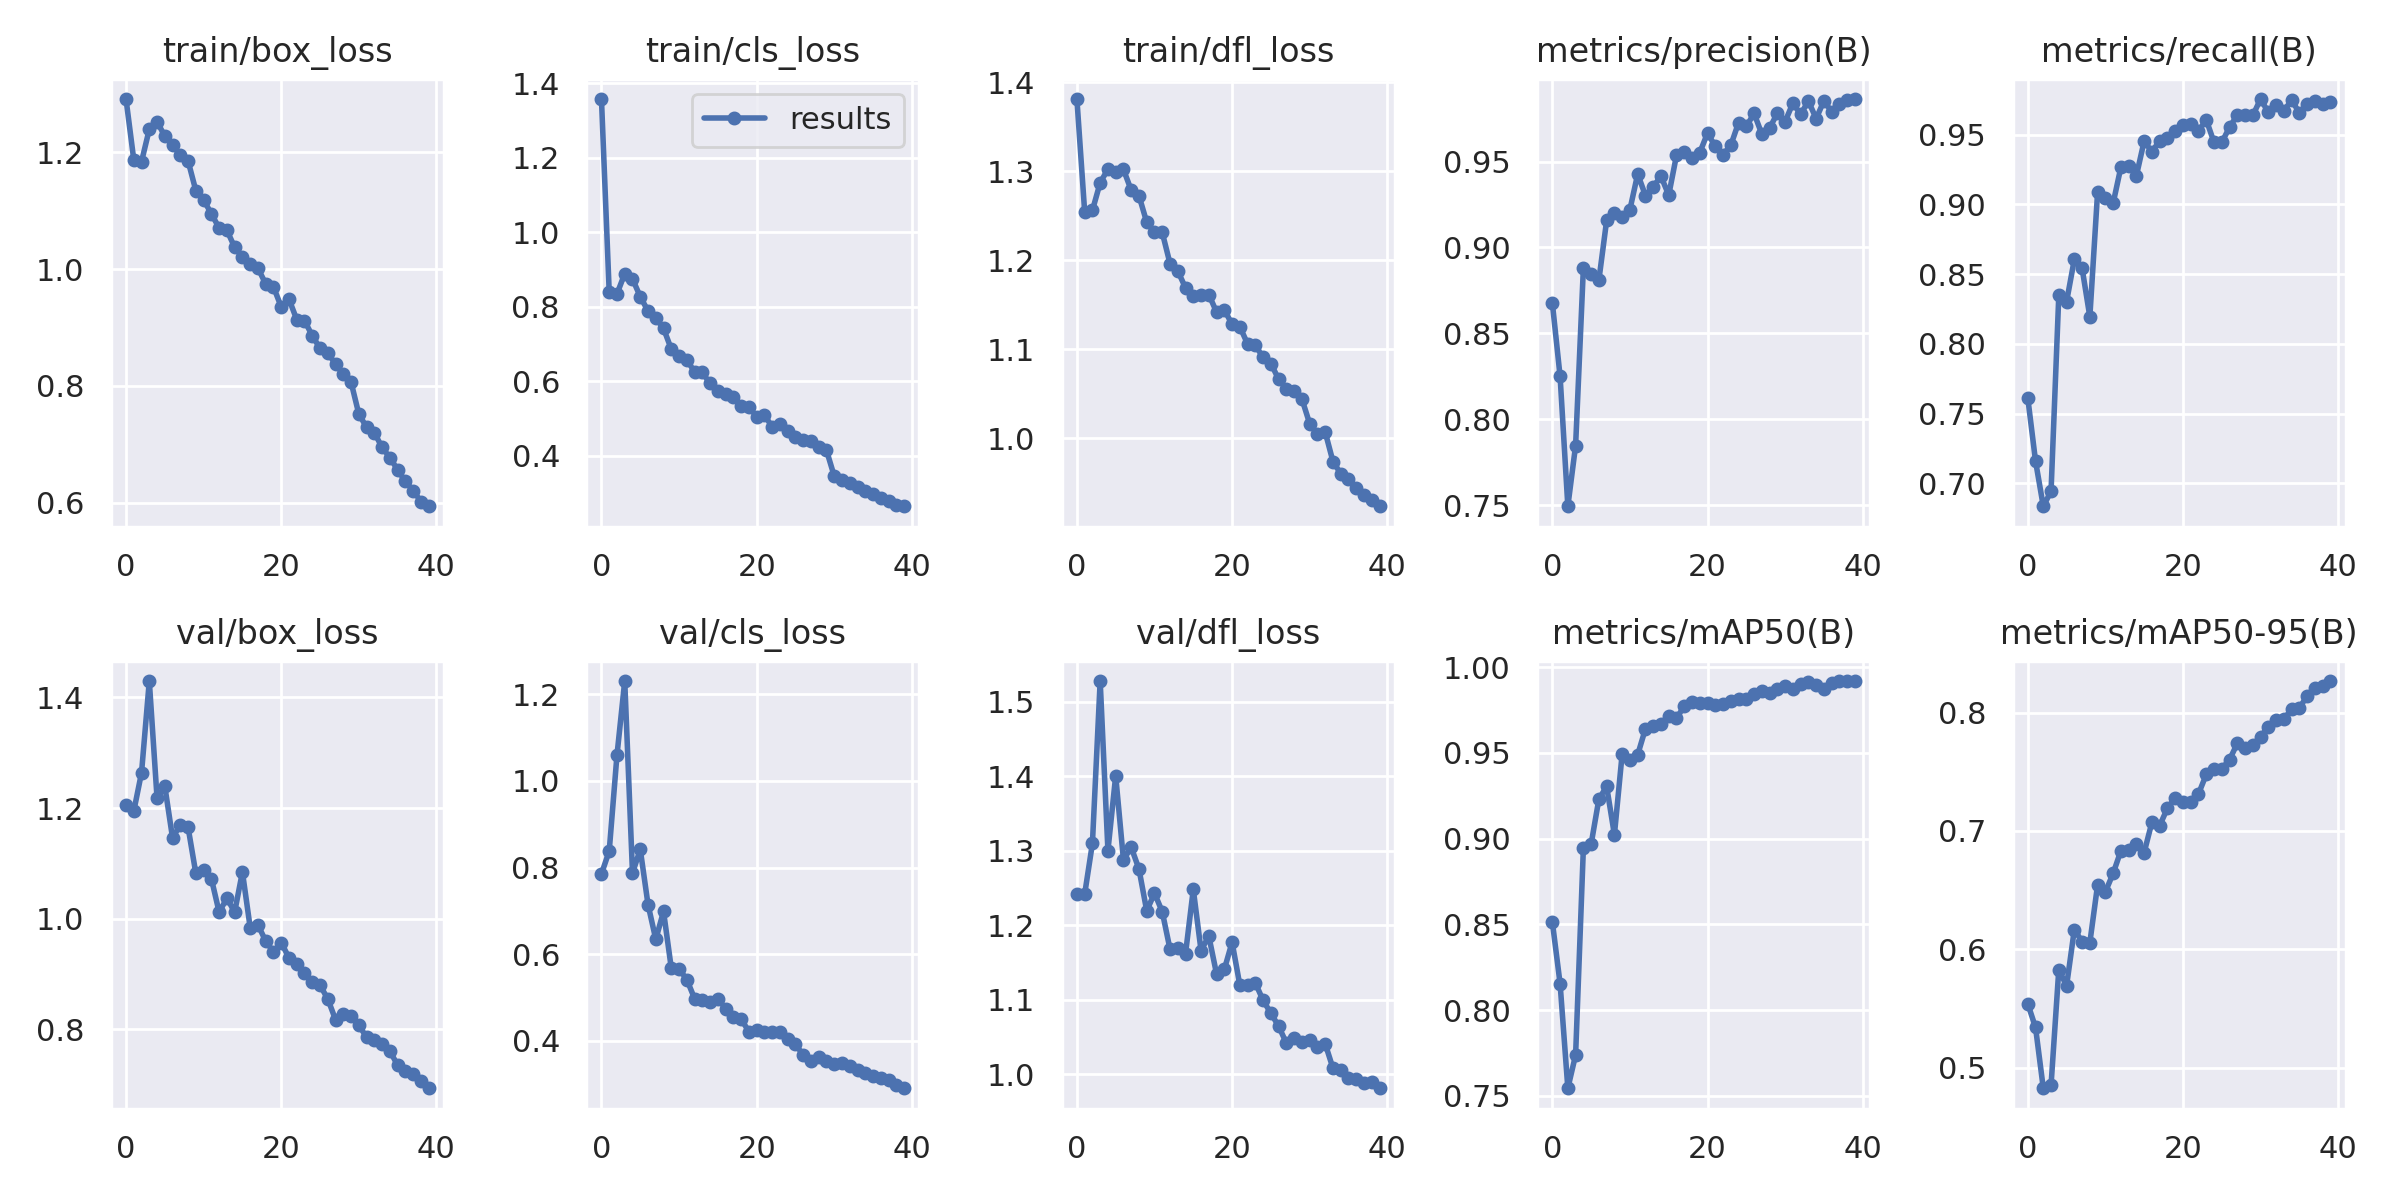

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


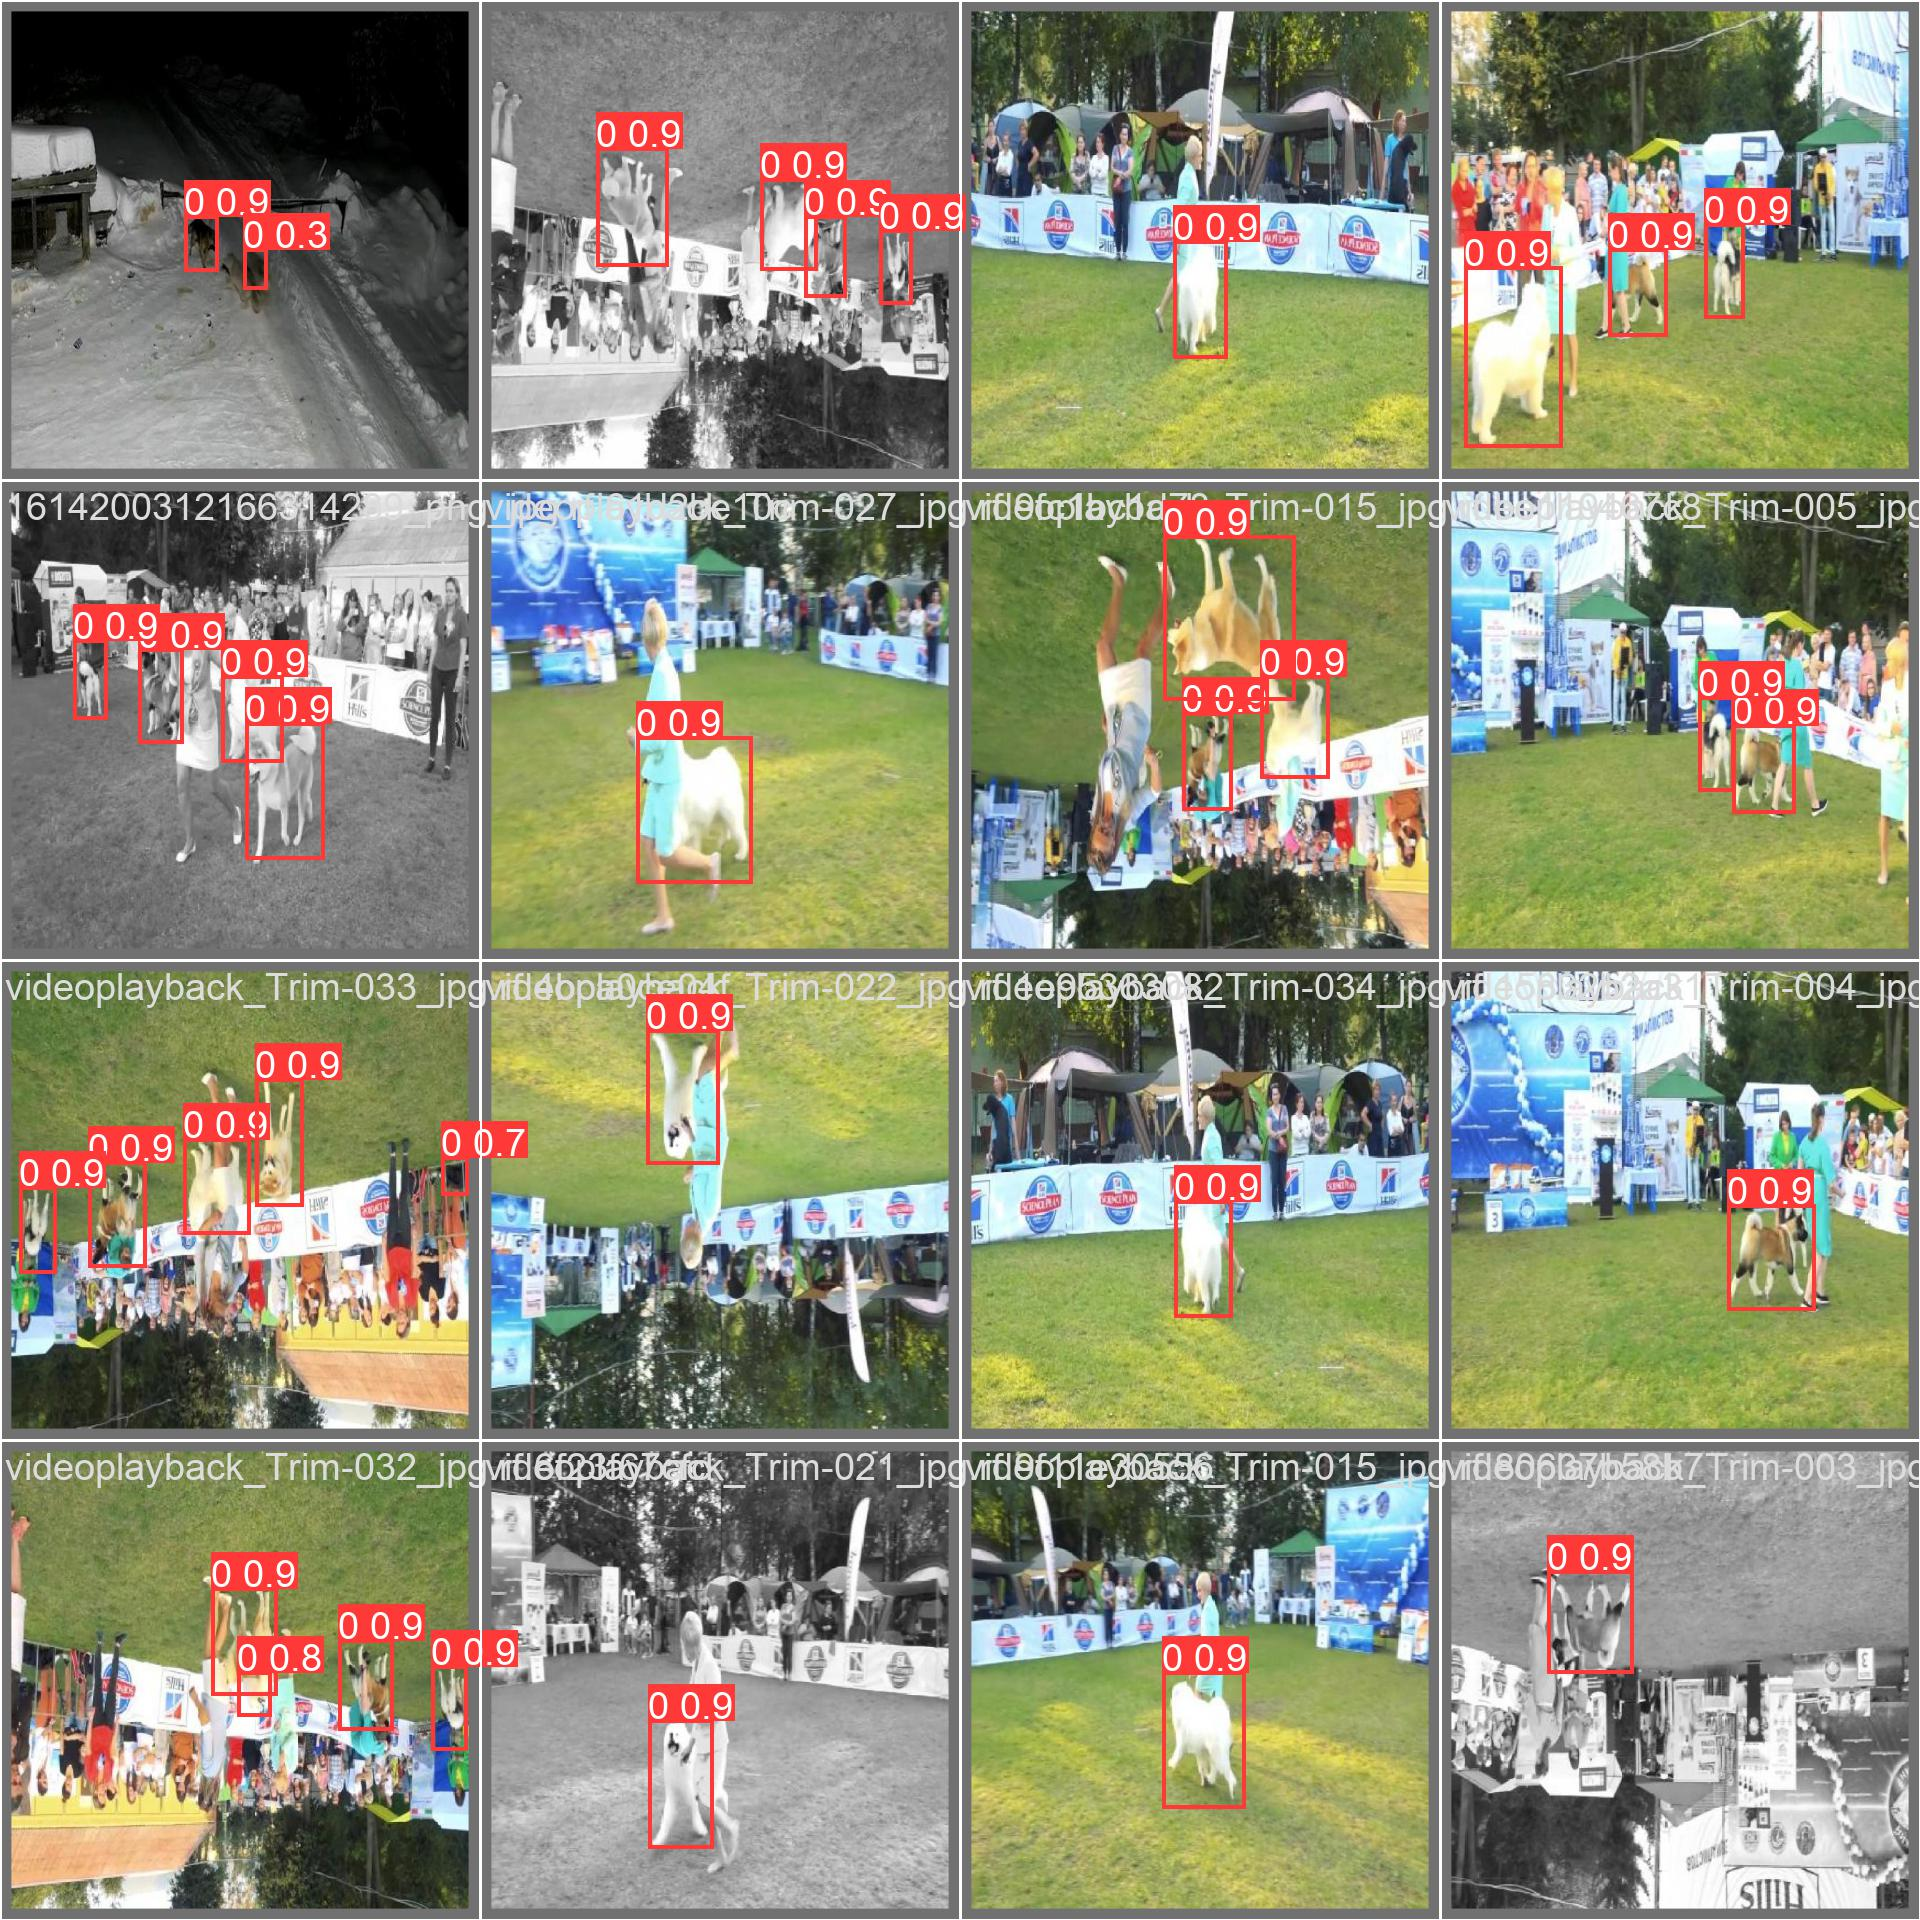

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Model validation

In [ ]:
%cd {HOME}

#!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.11 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Fusing... 
Model summary: 268 layers, 68124531 parameters, 0 gradients, 257.4 GFLOPs
val: Scanning /content/datasets/doggDetect-5/valid/labels.cache... 353 images, 0 backgrounds, 0 corrupt: 100% 353/353 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 23/23 [00:25<00:00,  1.11s/it]
                   all        353       1119      0.986      0.974      0.992      0.827
Speed: 0.8ms pre-process, 62.1ms inference, 0.0ms loss, 1.4ms post-process per image


/content


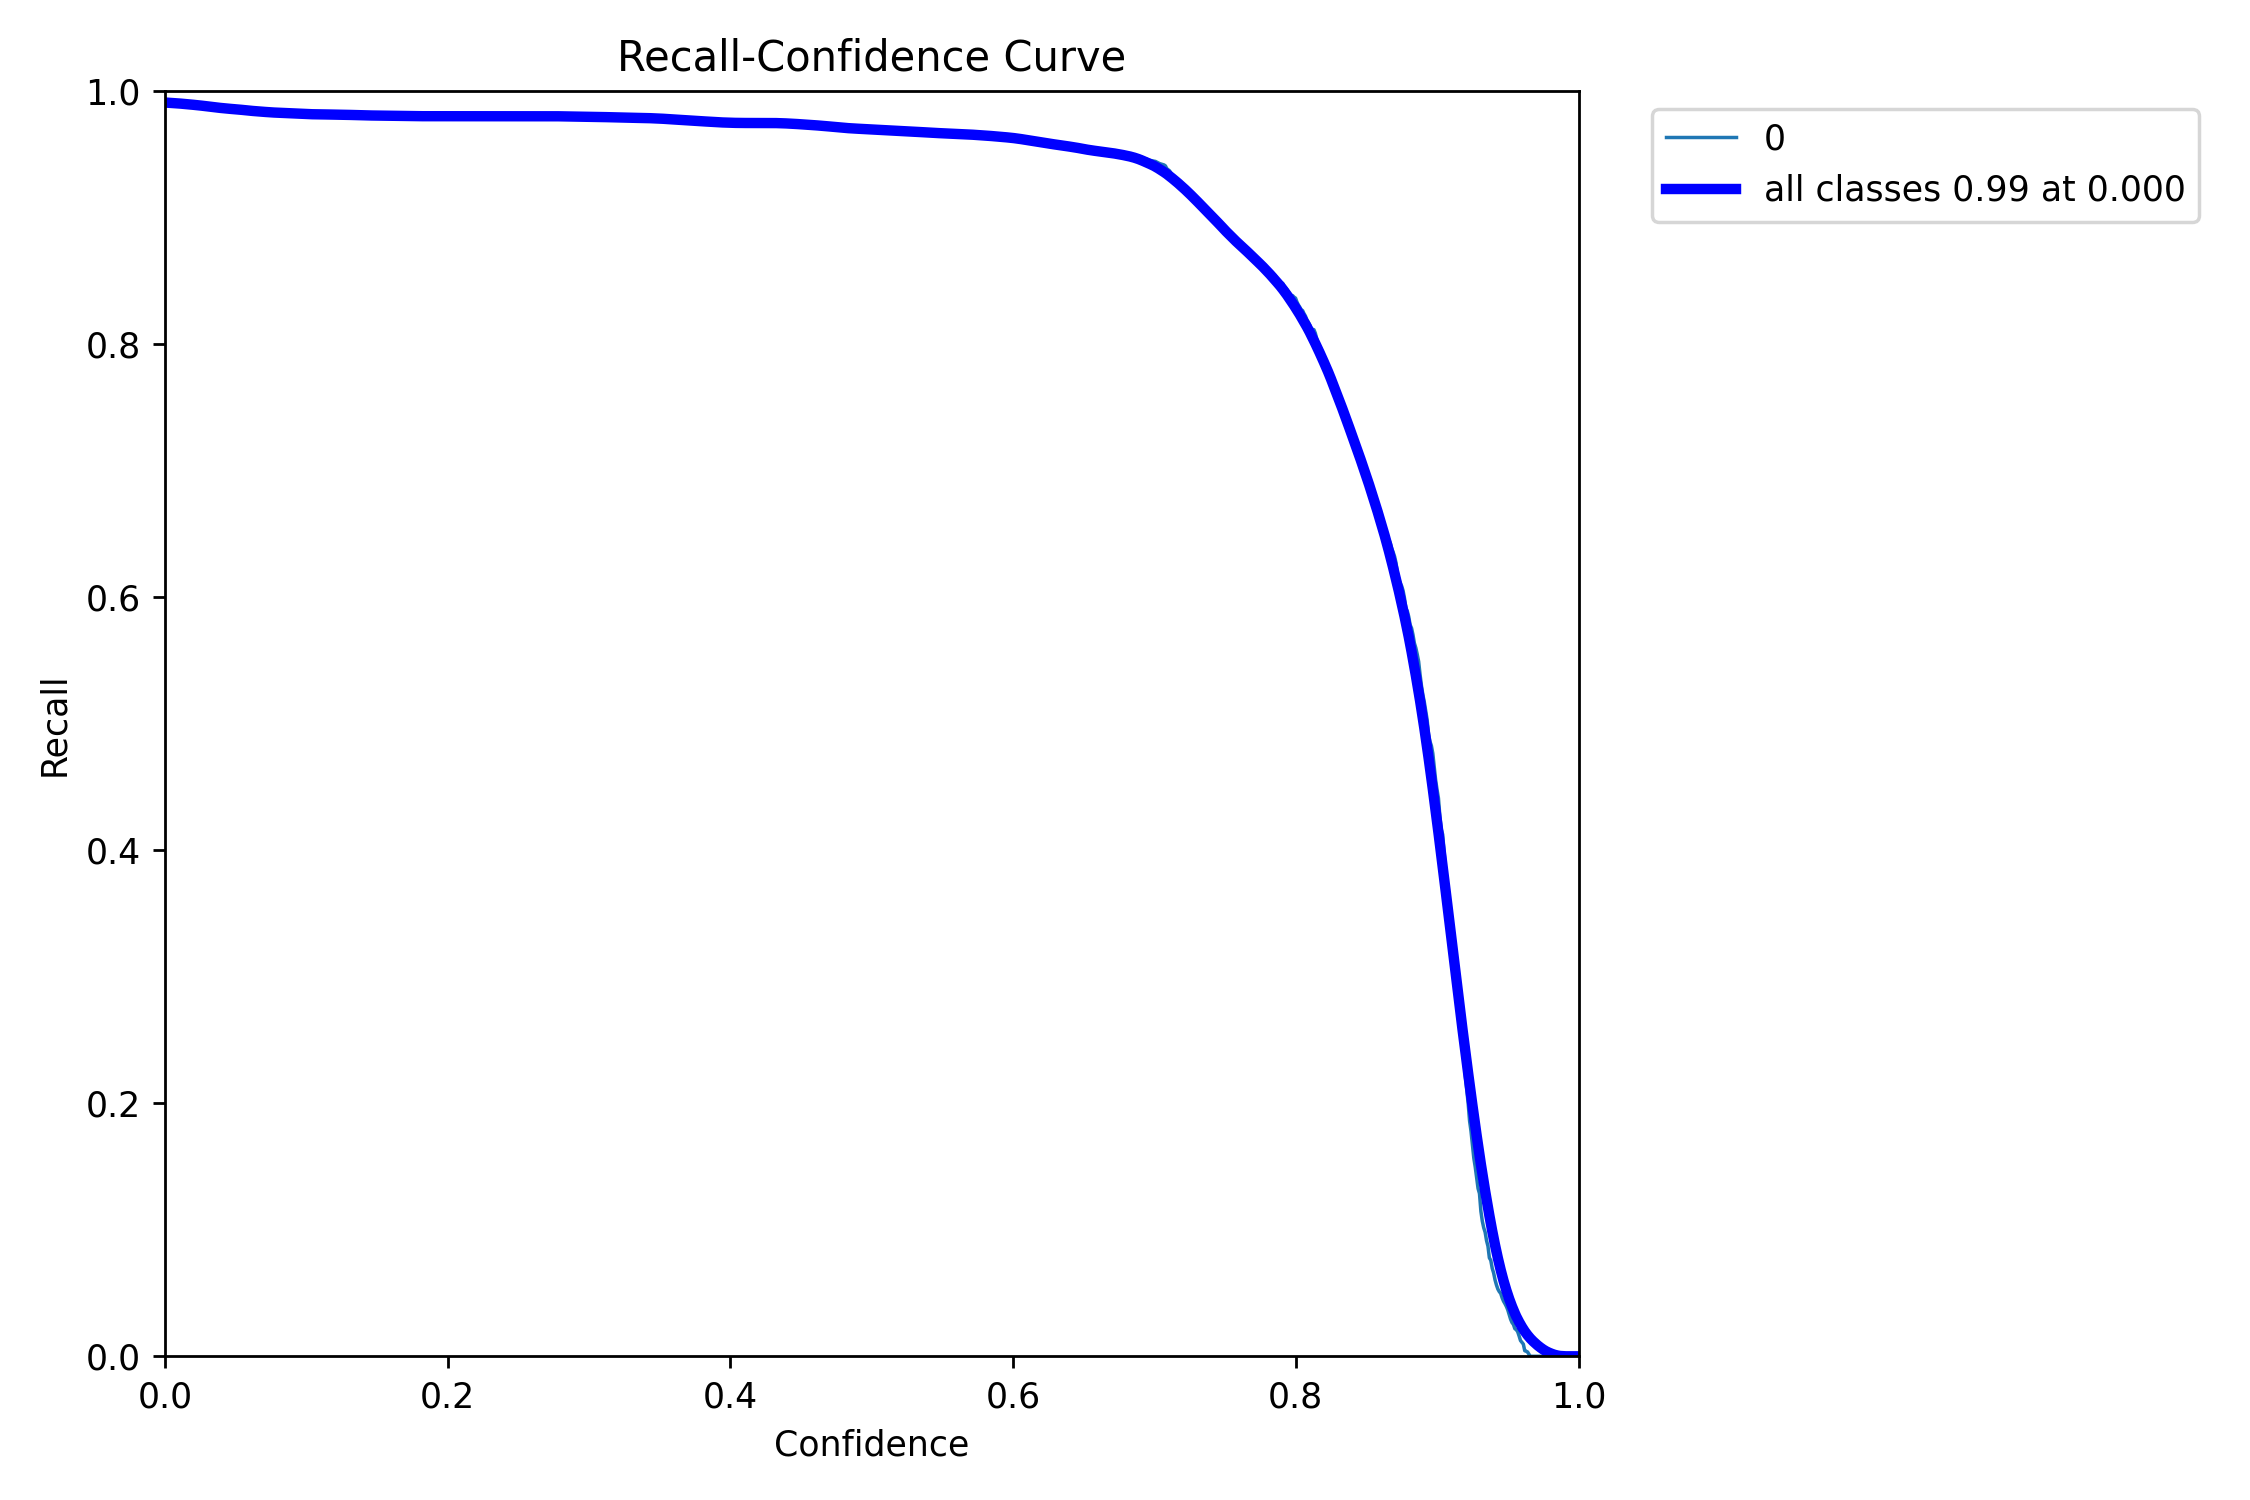

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/val/R_curve.png', width=600)

/content


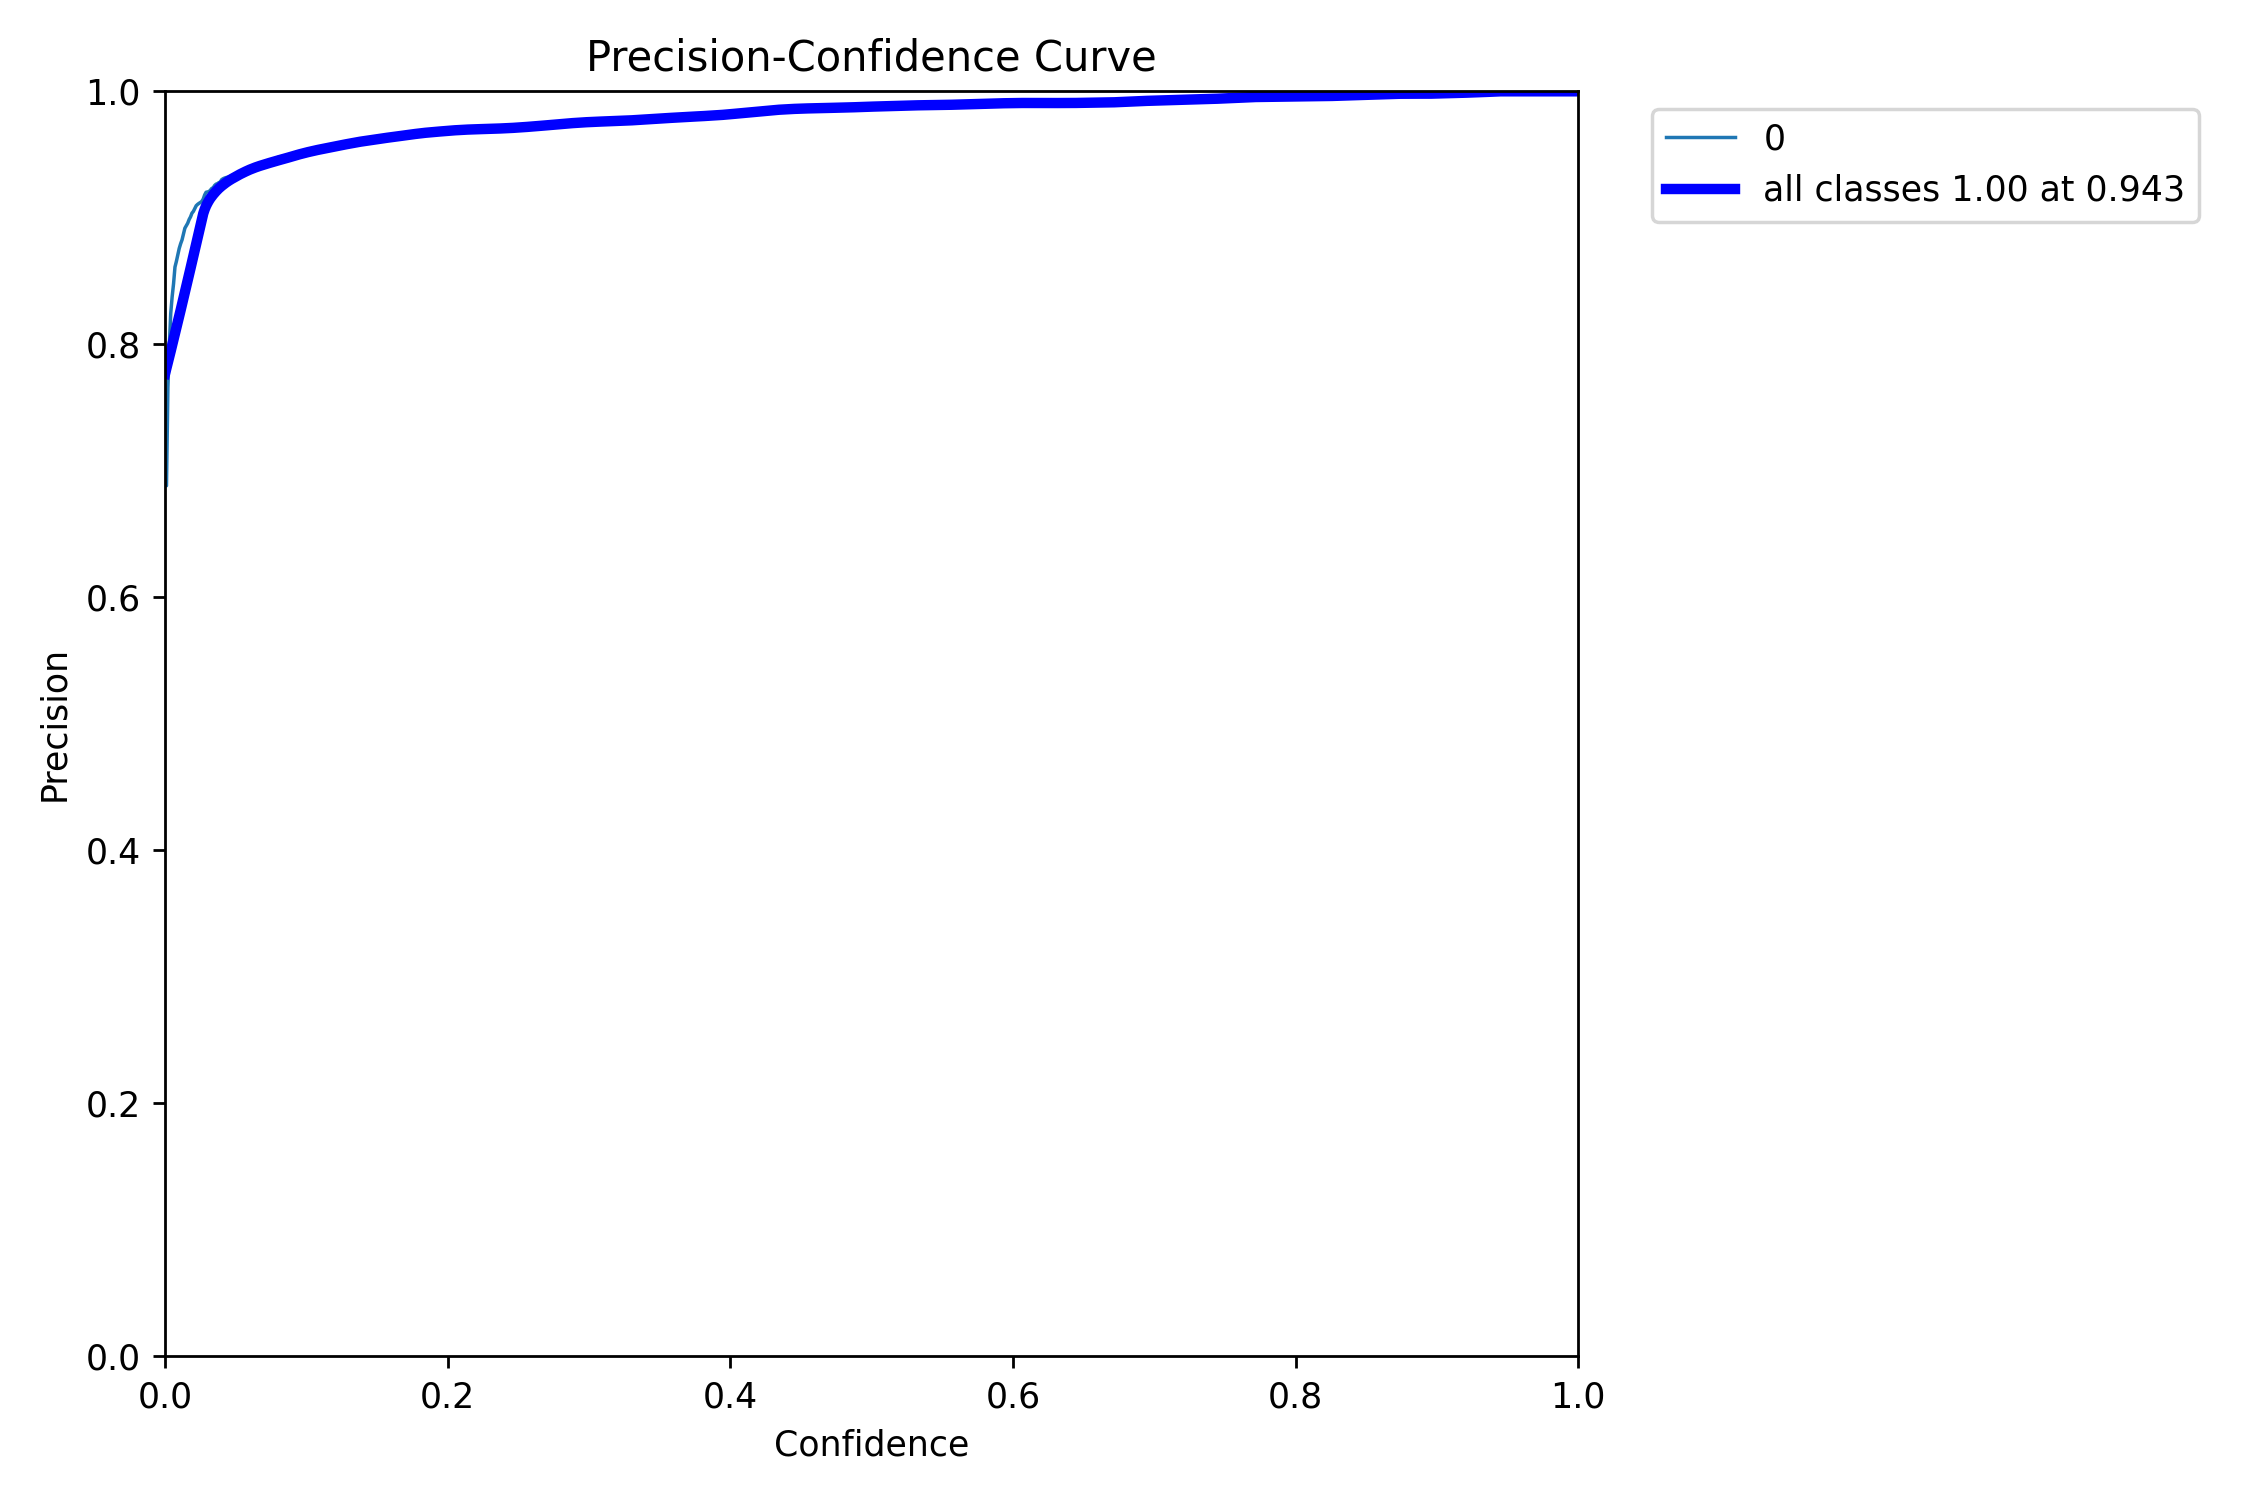

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/val/P_curve.png', width=600)

/content


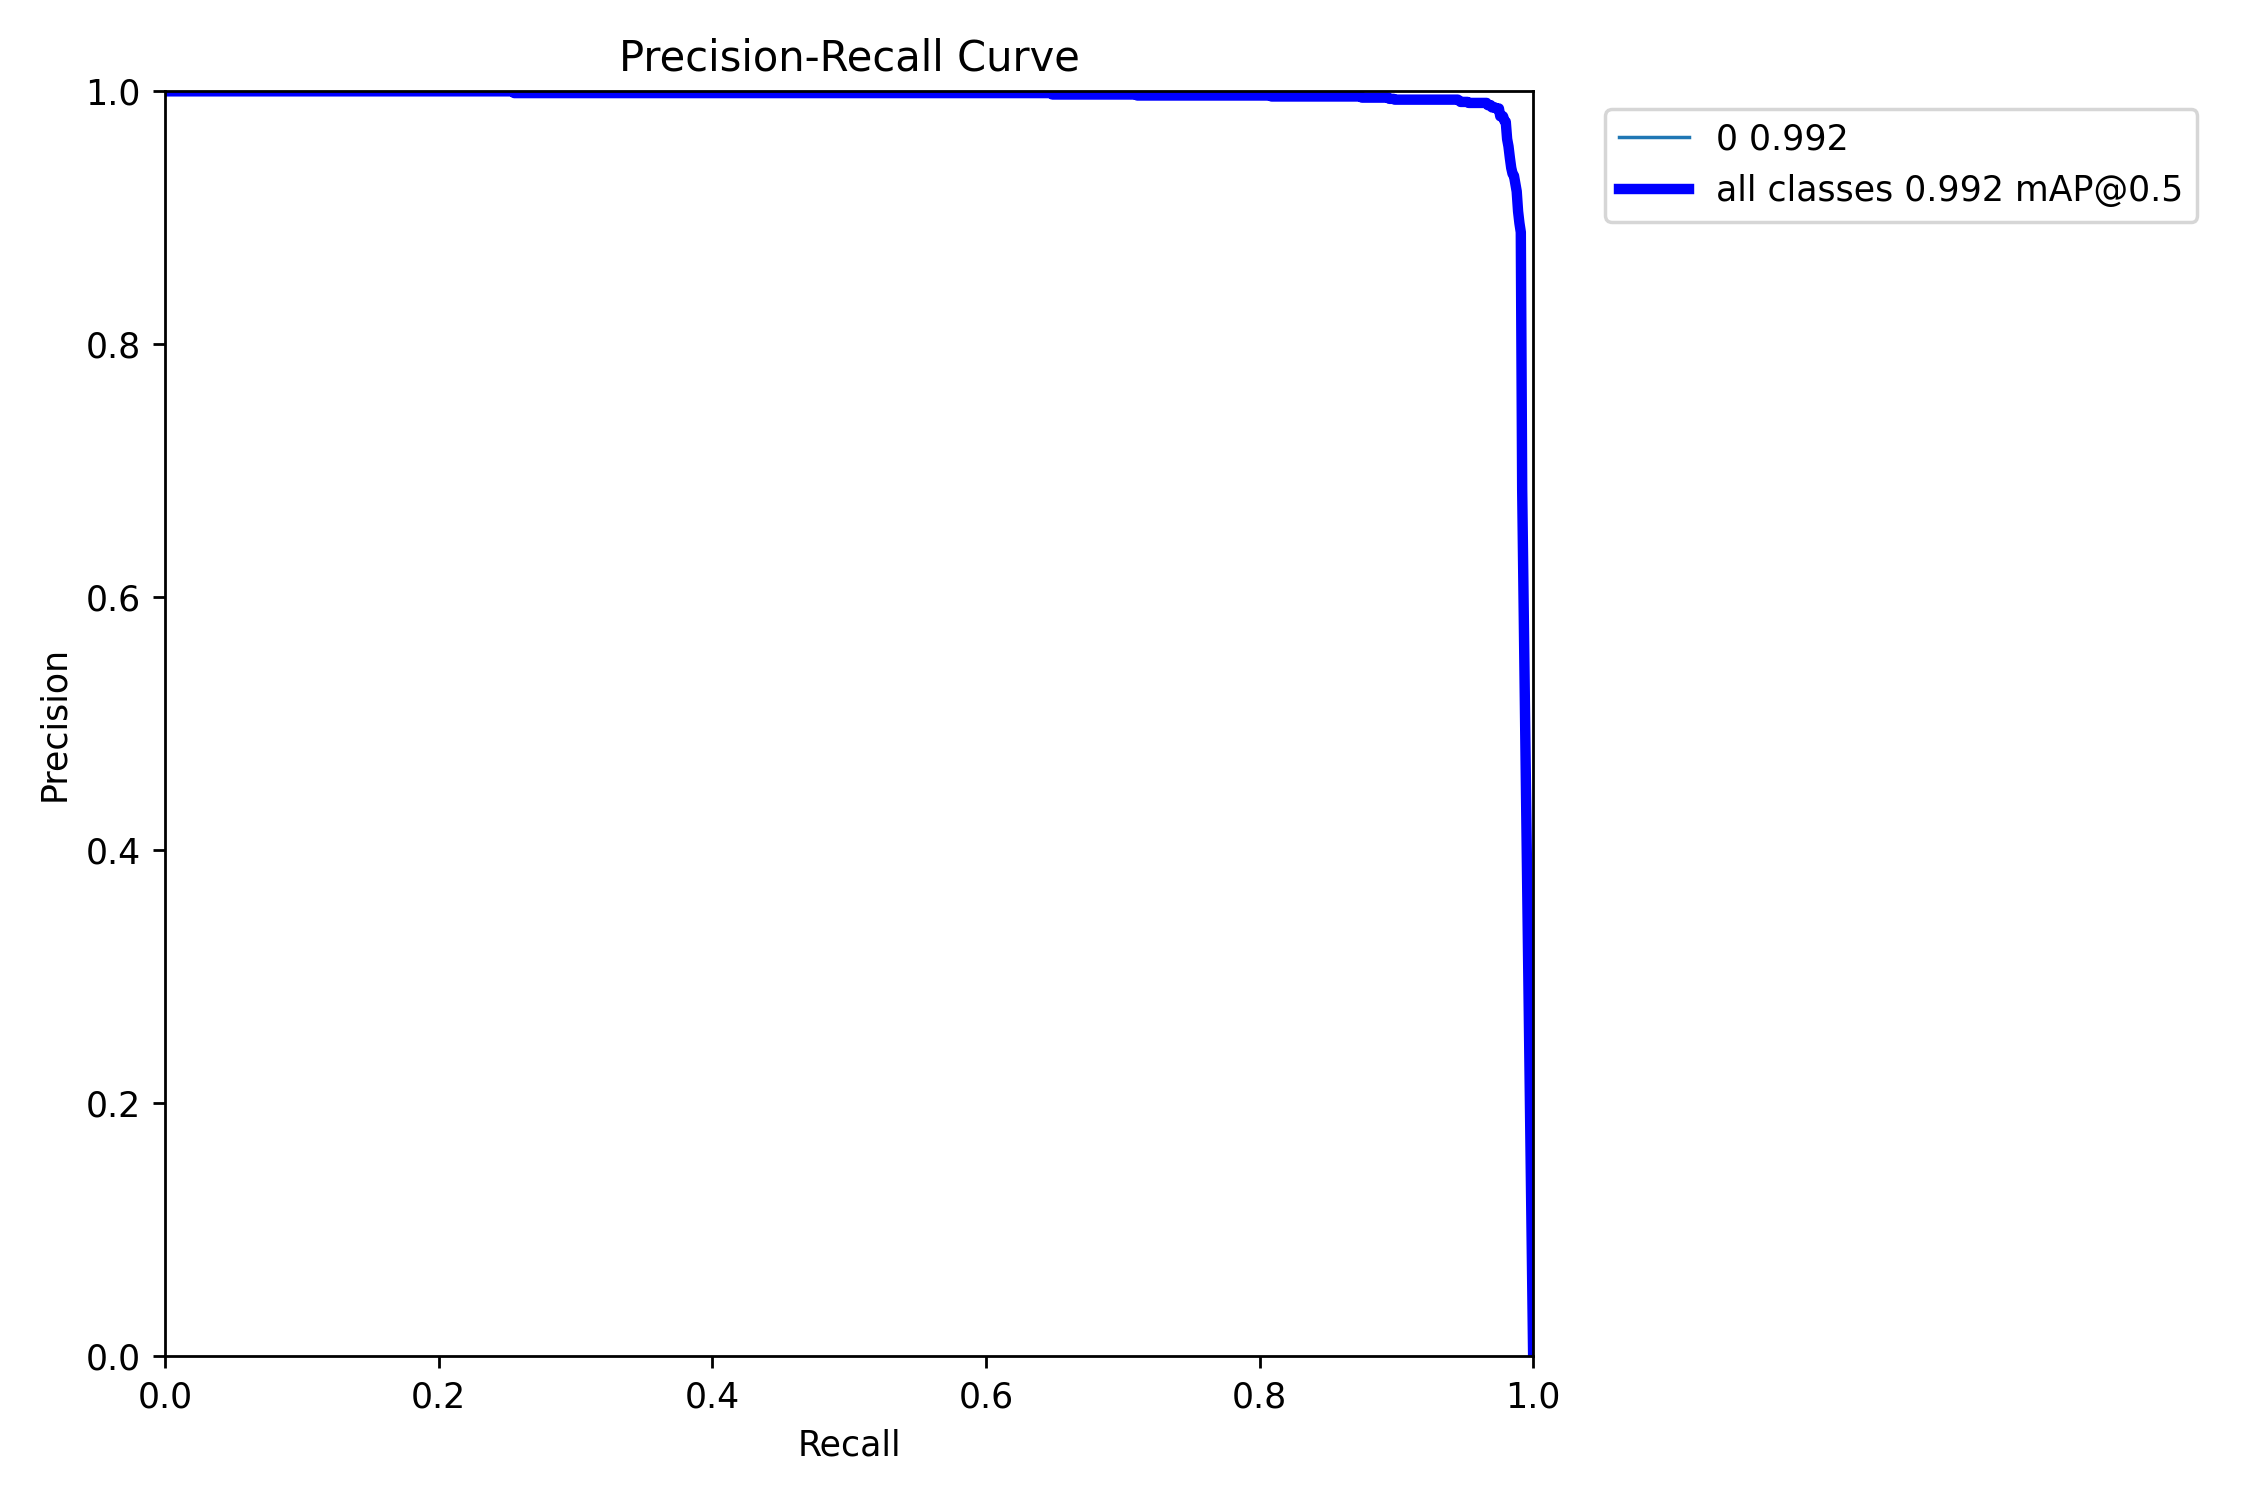

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/val/PR_curve.png', width=600)

/content


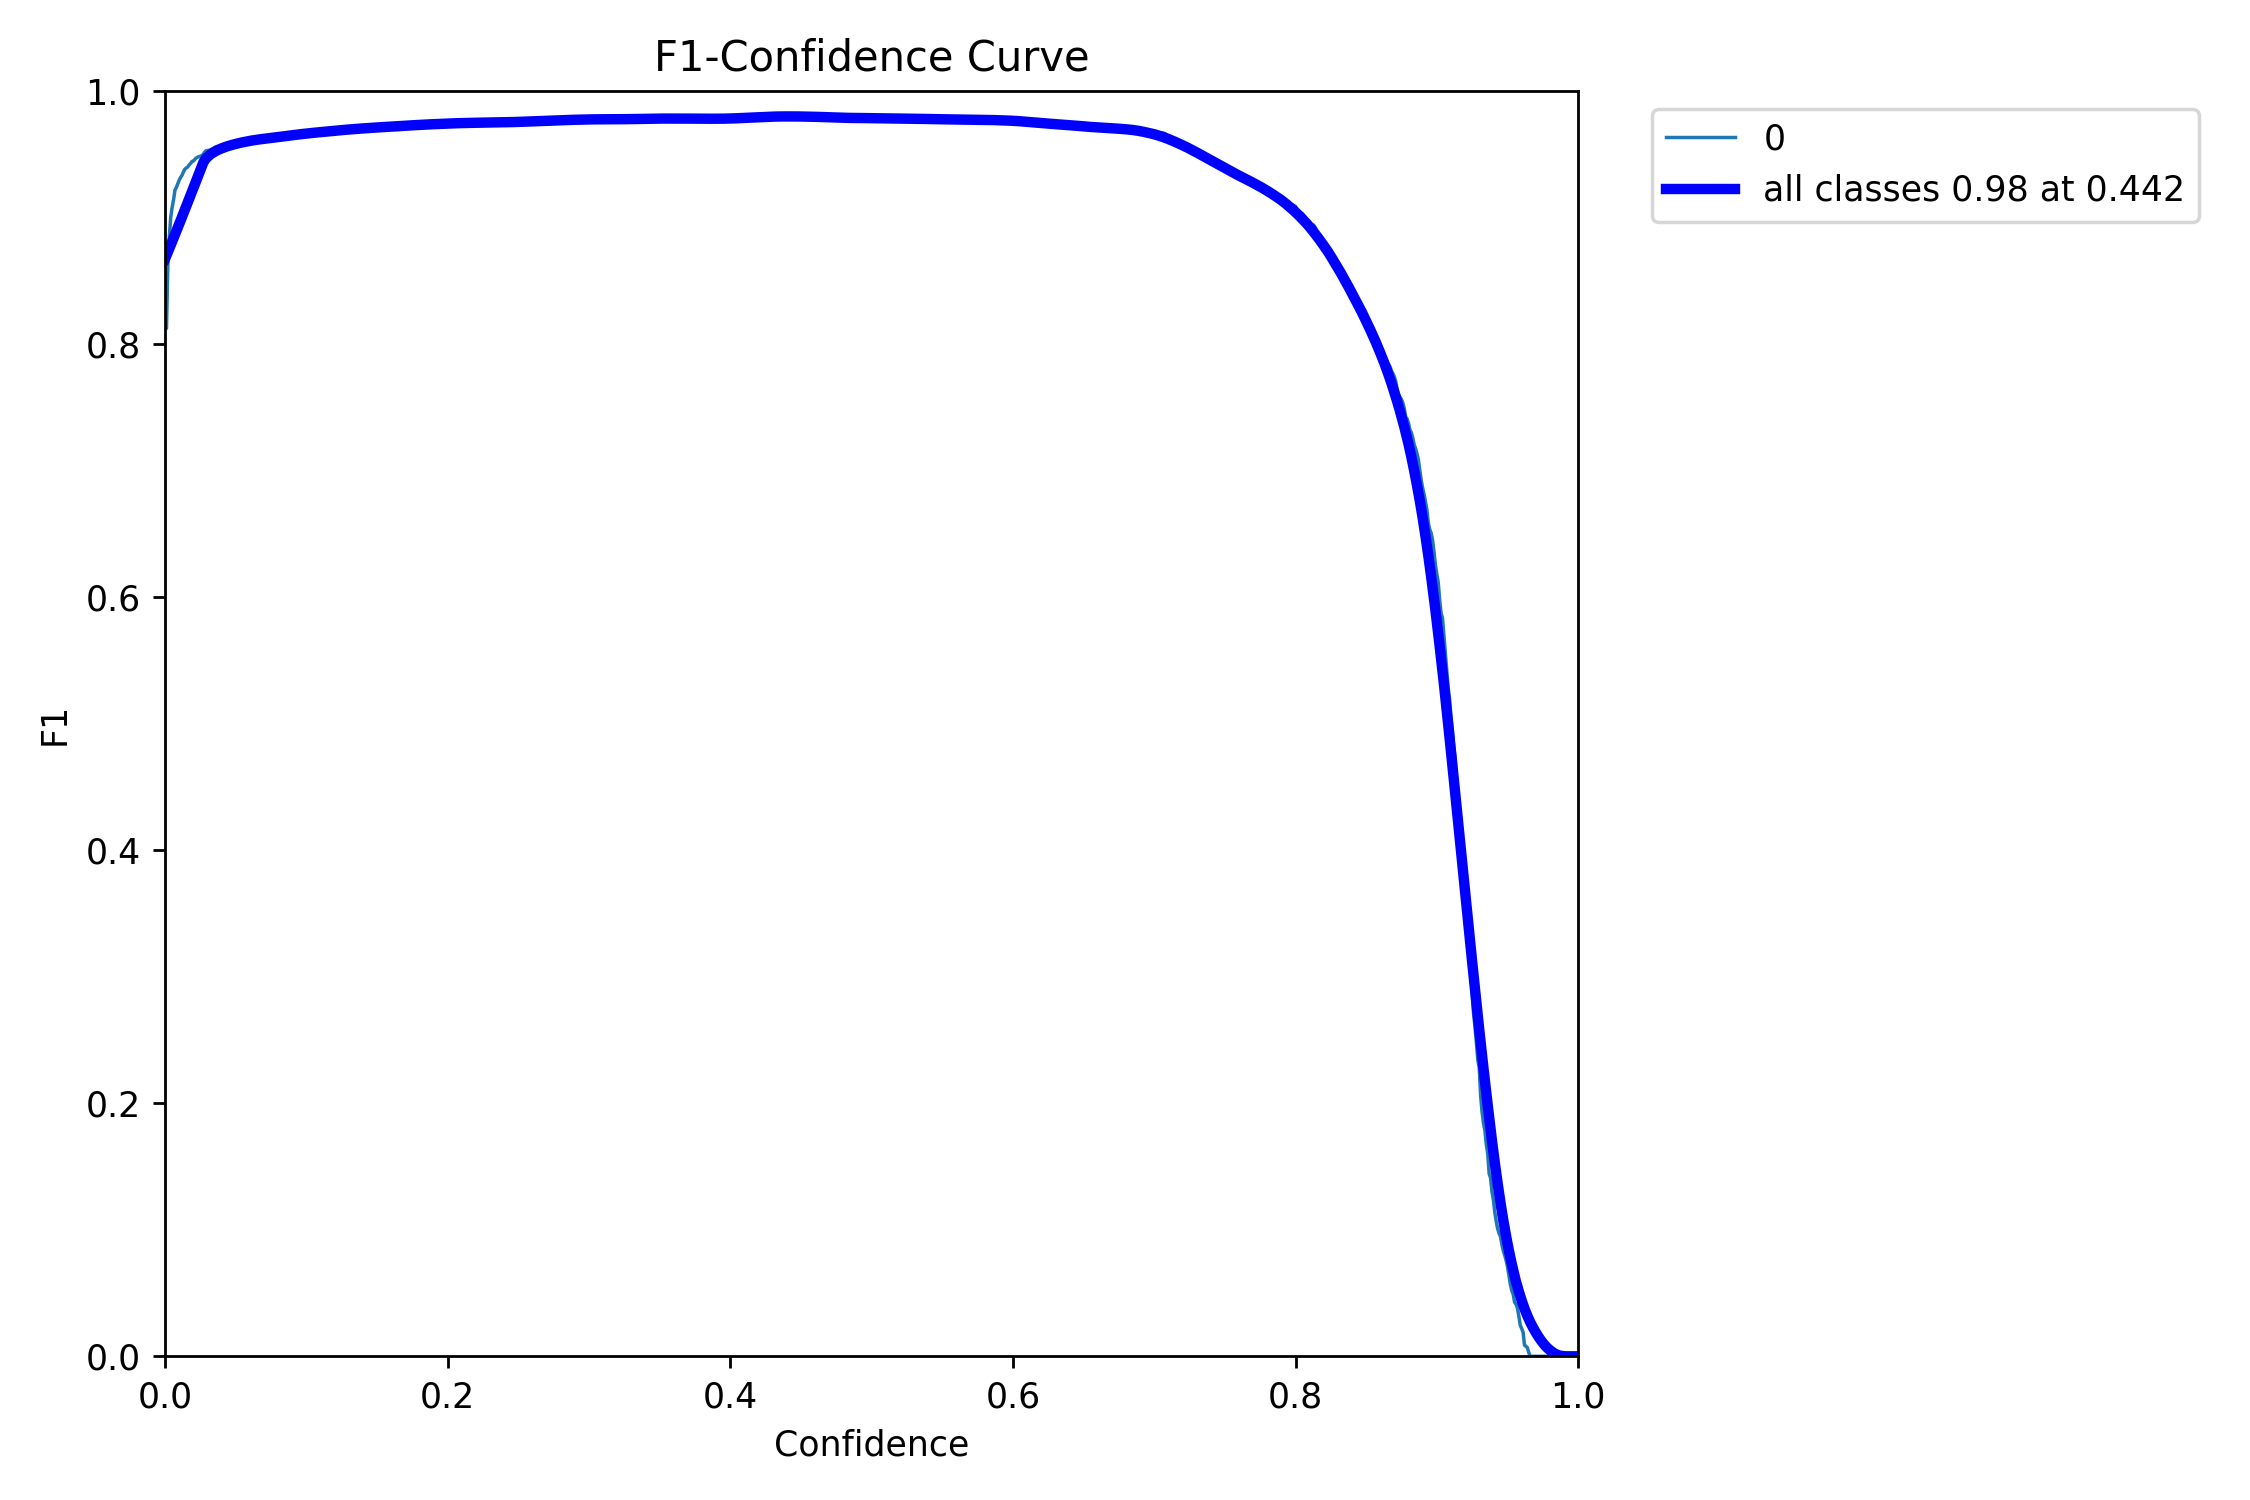

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/val/F1_curve.png', width=600)

/content


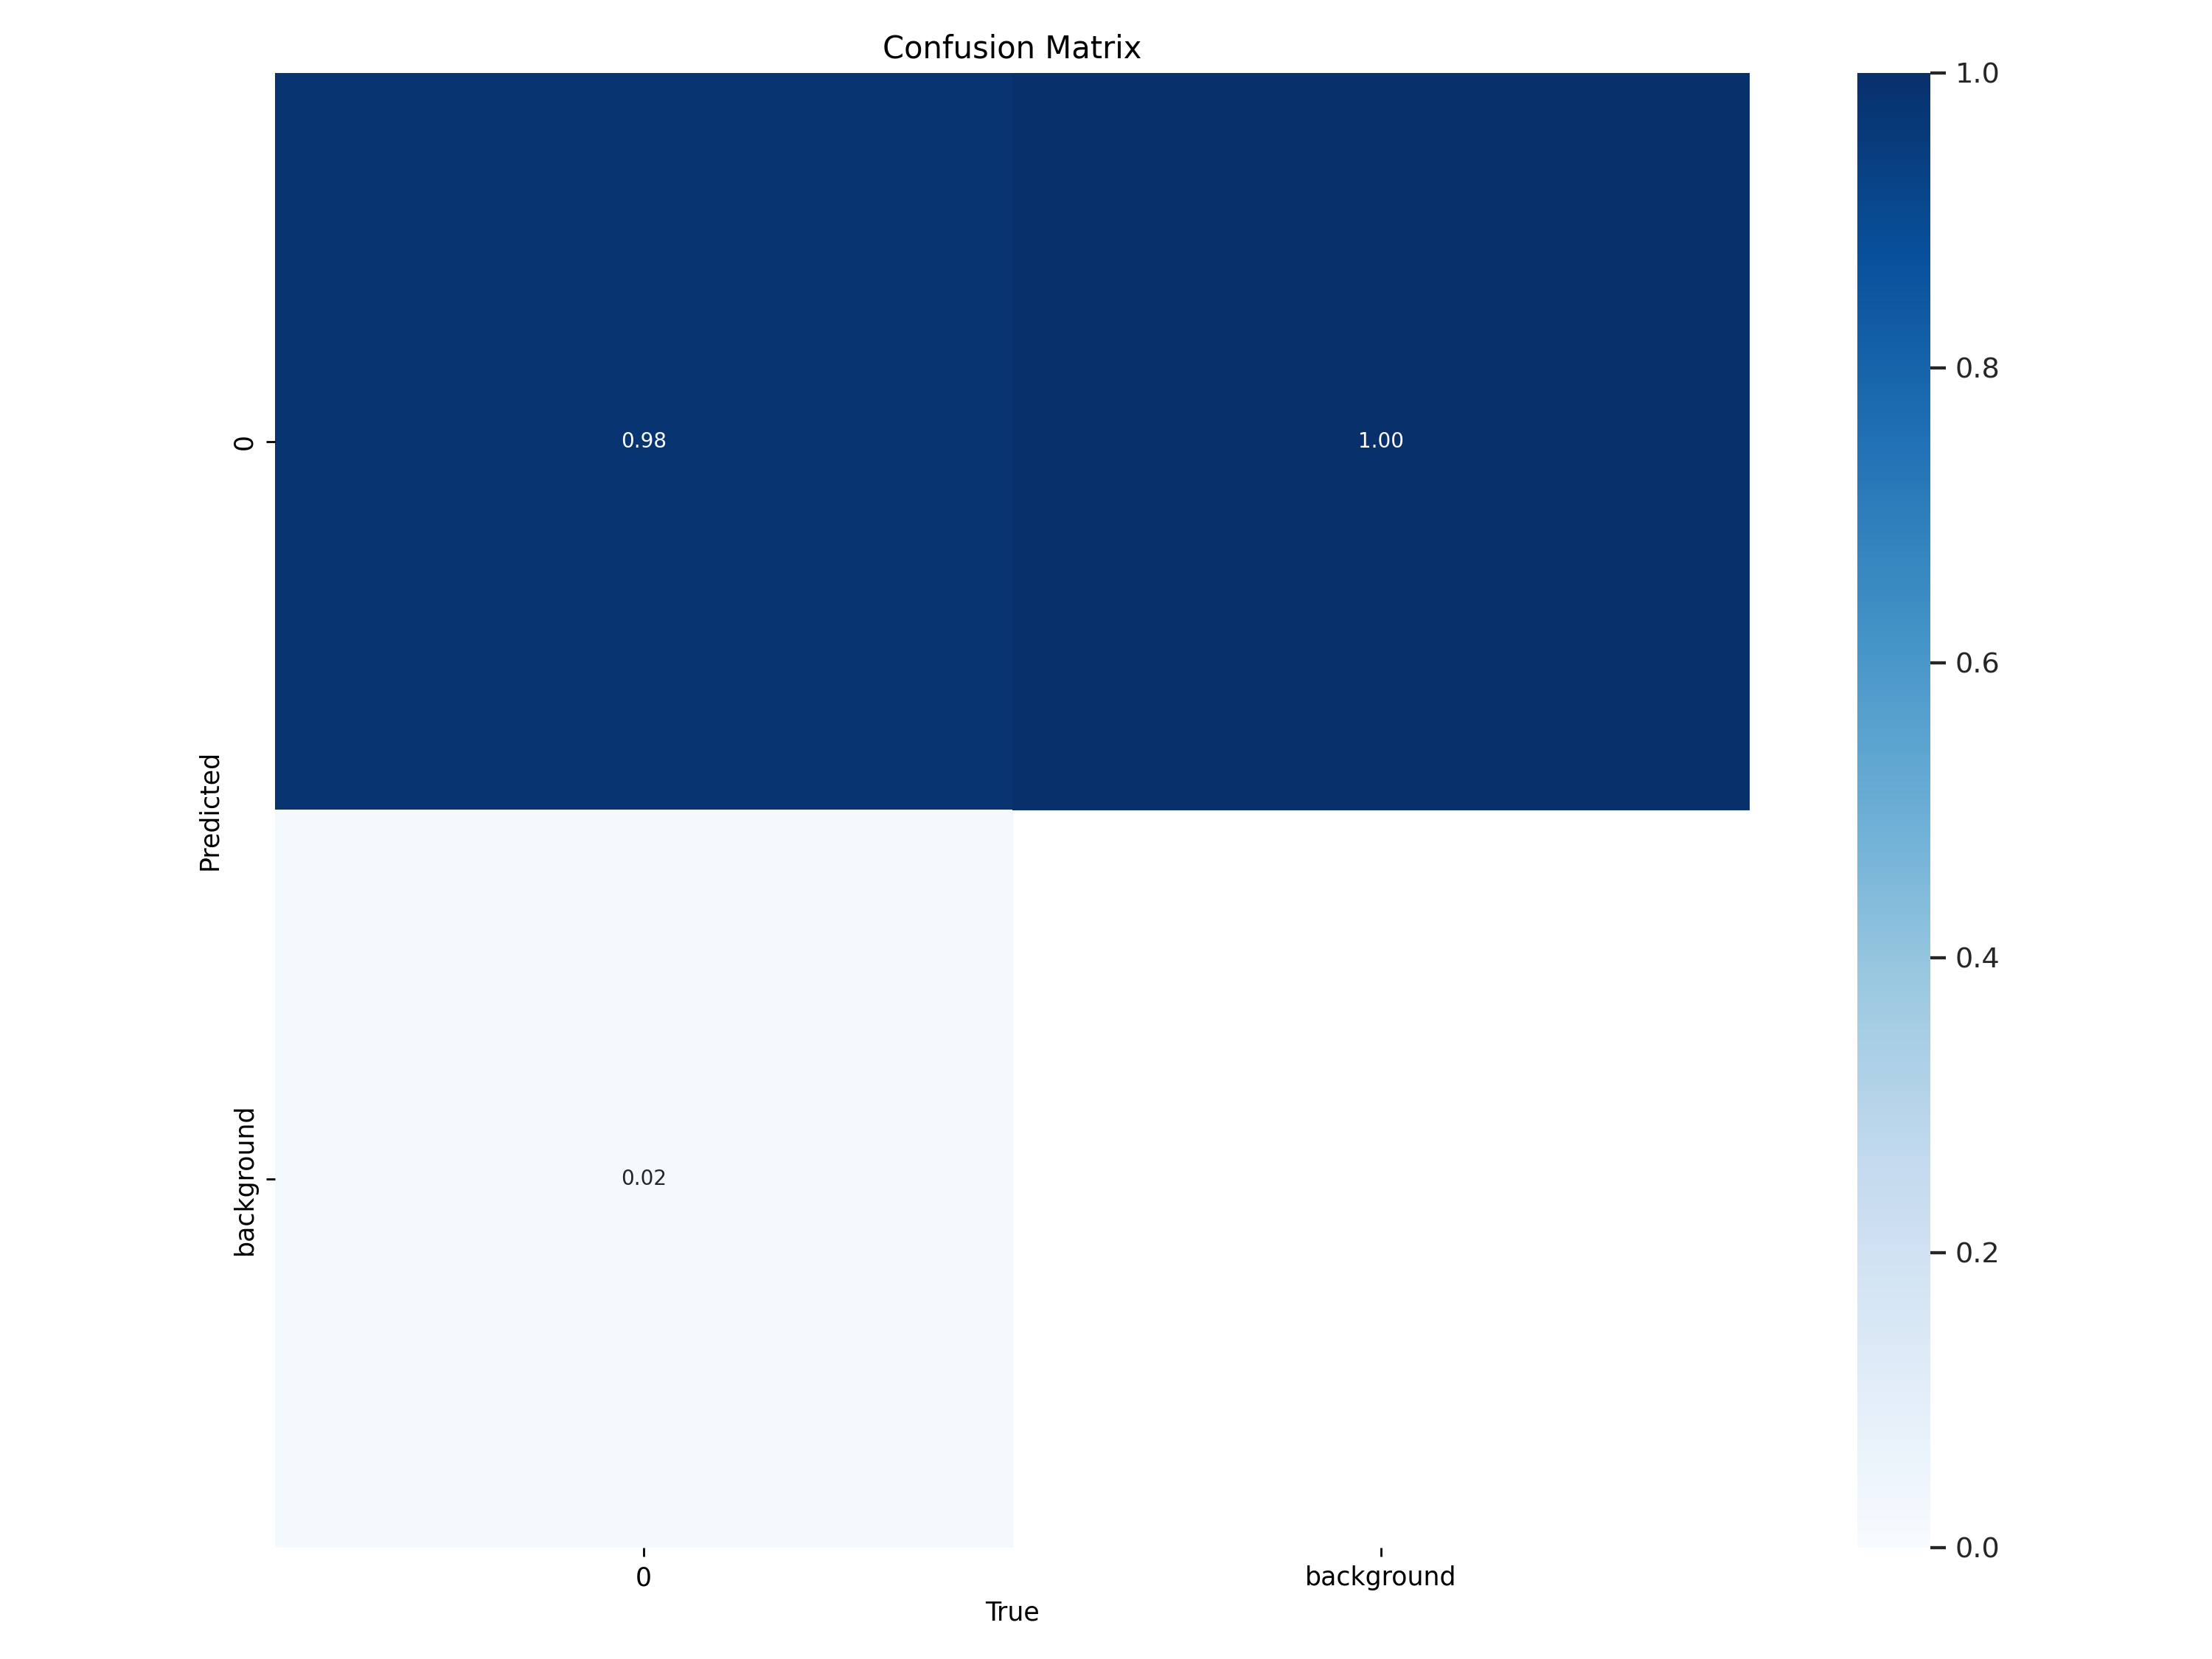

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/val/confusion_matrix.png', width=600)

/content


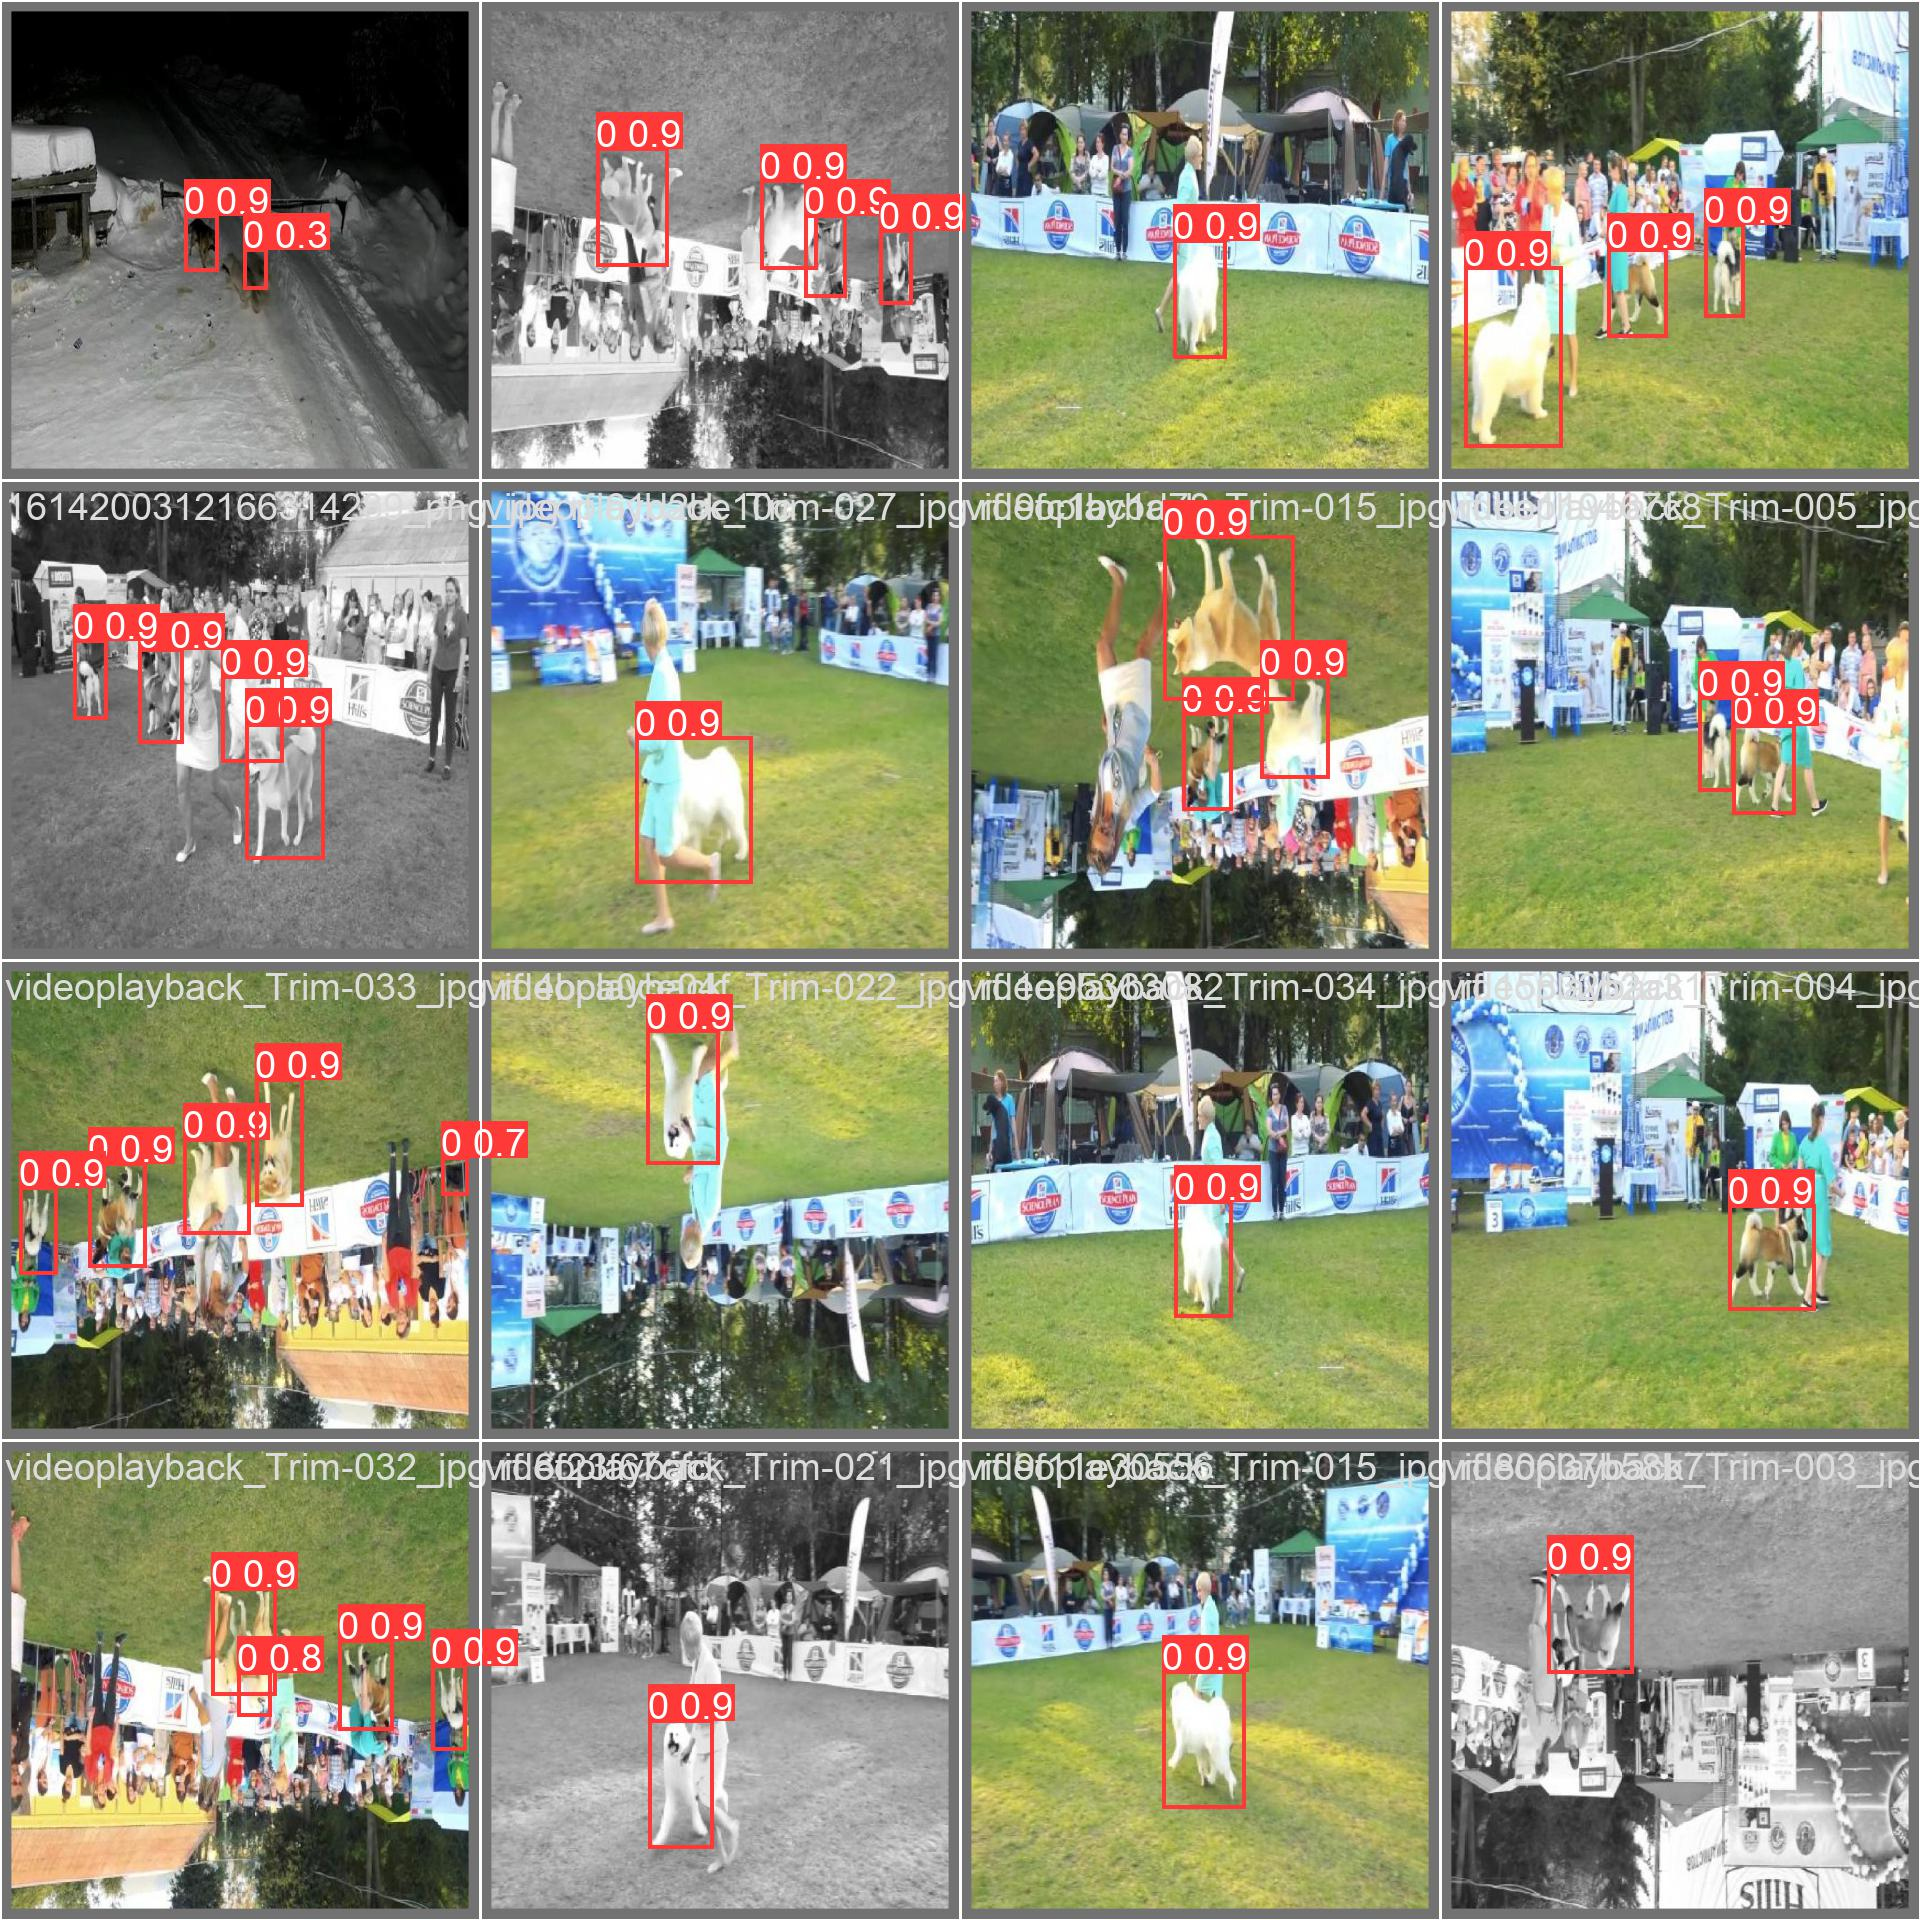

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/val/val_batch0_pred.jpg', width=600)

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.50 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.11 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Fusing... 
Model summary: 268 layers, 68124531 parameters, 0 gradients, 257.4 GFLOPs
image 1/154 /content/datasets/doggDetect-5/test/images/1450346004-838_jpg.rf.9040ab81de51b8354dfefe032c49ef73.jpg: 640x640 5 0s, 101.3ms
image 2/154 /content/datasets/doggDetect-5/test/images/1582559895_1594893403_png_jpg.rf.227ec434067cfe650cf4fe3afe7e8266.jpg: 640x640 3 0s, 63.9ms
image 3/154 /content/datasets/doggDetect-5/test/images/2622937401_png_jpg.rf.721718973dbe7ac2eba62615ac591a3b.jpg: 640x640 2 0s, 64.0ms
image 4/154 /content/datasets/doggDetect-5/test/images/5b6a7d53d7359312652d0e916ab3a33528f08596b258962fd9a544ebf4d0_png_jpg.rf.3ef687bcfe341f70ea82dd6c463857f4.jpg: 640x640 7 0s, 60.7ms
image 5/154 /content/datasets/doggDetect-5/test/images/96bcf52e8eb3099c25c54252a1dab0a2_full_jpg.rf.a7666c4f4344d0ad115eabe6bf175225.jpg: 640x640 9 0s, 57.4ms
image 6/154 /content/datasets/doggDetect-5/test/images

## Deploy model on Roboflow

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

View the status of your deployment at: https://app.roboflow.com/majalberkane/doggdetect/deploy/5
Share your model with the world at: https://universe.roboflow.com/majalberkane/doggdetect/model/5


We will ZIP our weights

In [ ]:
#!zip -r weights.zip runs/detect/train/weights/
!zip -r weights.zip . -i runs/detect/train/weights/

  adding: runs/detect/train/weights/ (stored 0%)


Tracking and counting

In [ ]:
%cd {HOME}
!git clone https://github.com/ifzhang/ByteTrack.git
!cd ByteTrack && pip3 install -q -r requirements.txt
!cd ByteTrack && python3 setup.py -q develop
!pip install -q cython_bbox
!pip install -q onemetric

from IPython import display
display.clear_output()


import sys
sys.path.append(f"{HOME}/ByteTrack")


import yolox
print("yolox.__version__:", yolox.__version__)

yolox.__version__: 0.1.0


In [ ]:
!pip install -i https://test.pypi.org/simple/ supervision


from IPython import display
display.clear_output()


import supervision
print("supervision.__version__:", supervision.__version__)

supervision.__version__: 0.1.0


In [ ]:
print("lap.__version__:", supervision.__version__)

lap.__version__: 0.1.0


In [ ]:
from yolox.tracker.byte_tracker import BYTETracker, STrack
from onemetric.cv.utils.iou import box_iou_batch
from dataclasses import dataclass


@dataclass(frozen=True)
class BYTETrackerArgs:
    track_thresh: float = 0.25
    track_buffer: int = 30
    match_thresh: float = 0.8
    aspect_ratio_thresh: float = 3.0
    min_box_area: float = 1.0
    mot20: bool = False

In [ ]:
from supervision.draw.color import ColorPalette
from supervision.geometry.dataclasses import Point
from supervision.video.dataclasses import VideoInfo
from supervision.video.source import get_video_frames_generator
from supervision.video.sink import VideoSink
from supervision.notebook.utils import show_frame_in_notebook
from supervision.tools.detections import Detections, BoxAnnotator
from supervision.tools.line_counter import LineCounter, LineCounterAnnotator

Tracking utils

In [ ]:
from typing import List, Optional, Union

import cv2
import numpy as np

from supervision.draw.color import Color, ColorPalette


class BoxAnnotator:
    def __init__(
        self,
        color: Union[Color, ColorPalette],
        thickness: int = 2,
        text_color: Color = Color.black(),
        text_scale: float = 0.5,
        text_thickness: int = 1,
        text_padding: int = 10,
    ):
        """
        A class for drawing bounding boxes on an image using detections provided.
        :param color: Union[Color, ColorPalette] :  The color to draw the bounding box, can be a single color or a color palette
        :param thickness: int :  The thickness of the bounding box lines, default is 2
        :param text_color: Color :  The color of the text on the bounding box, default is white
        :param text_scale: float :  The scale of the text on the bounding box, default is 0.5
        :param text_thickness: int :  The thickness of the text on the bounding box, default is 1
        :param text_padding: int :  The padding around the text on the bounding box, default is 5
        """
        self.color: Union[Color, ColorPalette] = color
        self.thickness: int = thickness
        self.text_color: Color = text_color
        self.text_scale: float = text_scale
        self.text_thickness: int = text_thickness
        self.text_padding: int = text_padding

    def annotate(
        self,
        frame: np.ndarray,
        detections: Detections,
        labels: Optional[List[str]] = None,
    ) -> np.ndarray:
        """
        Draws bounding boxes on the frame using the detections provided.
        :param frame: np.ndarray : The image on which the bounding boxes will be drawn
        :param detections: Detections : The detections for which the bounding boxes will be drawn
        :param labels: Optional[List[str]] :  An optional list of labels corresponding to each detection. If labels is provided, the confidence score of the detection will be replaced with the label.
        :return: np.ndarray : The image with the bounding boxes drawn on it
        """
        font = cv2.FONT_HERSHEY_SIMPLEX
        for i, (xyxy, confidence, class_id, tracker_id) in enumerate(detections):
            color = (
                self.color.by_idx(class_id)
                if isinstance(self.color, ColorPalette)
                else self.color
            )
            text = (
                f"{confidence:0.2f}"
                if (labels is None or len(detections) != len(labels))
                else labels[i]
            )

            x1, y1, x2, y2 = xyxy.astype(int)
            text_width, text_height = cv2.getTextSize(
                text=text,
                fontFace=font,
                fontScale=self.text_scale,
                thickness=self.text_thickness,
            )[0]

            text_x = x1 + self.text_padding
            text_y = y1 - self.text_padding

            text_background_x1 = x1
            text_background_y1 = y1 - 2 * self.text_padding - text_height

            text_background_x2 = x1 + 2 * self.text_padding + text_width
            text_background_y2 = y1

            cv2.rectangle(
                img=frame,
                pt1=(x1, y1),
                pt2=(x2, y2),
                color=color.as_bgr(),
                thickness=self.thickness,
            )


        return frame

In [ ]:
from typing import List

import numpy as np


# converts Detections into format that can be consumed by match_detections_with_tracks function
def detections2boxes(detections: Detections) -> np.ndarray:
    return np.hstack((
        detections.xyxy,
        detections.confidence[:, np.newaxis]
    ))


# converts List[STrack] into format that can be consumed by match_detections_with_tracks function
def tracks2boxes(tracks: List[STrack]) -> np.ndarray:
    return np.array([
        track.tlbr
        for track
        in tracks
    ], dtype=float)


# matches our bounding boxes with predictions
def match_detections_with_tracks(
    detections: Detections,
    tracks: List[STrack]
) -> Detections:
    if not np.any(detections.xyxy) or len(tracks) == 0:
        return np.empty((0,))

    tracks_boxes = tracks2boxes(tracks=tracks)
    iou = box_iou_batch(tracks_boxes, detections.xyxy)
    track2detection = np.argmax(iou, axis=1)

    tracker_ids = [None] * len(detections)

    for tracker_index, detection_index in enumerate(track2detection):
        if iou[tracker_index, detection_index] != 0:
            tracker_ids[detection_index] = tracks[tracker_index].track_id

    return tracker_ids

In [ ]:
# settings
MODEL = "runs/detect/train/weights/best.pt"

In [ ]:
!pip install ultralytics==8.0.11

from ultralytics import YOLO

model = YOLO(MODEL)
model.fuse()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Fusing... 
Model summary: 268 layers, 68124531 parameters, 0 gradients, 257.4 GFLOPs


In [ ]:
# dict maping class_id to class_name
CLASS_NAMES_DICT = model.model.names
# class_ids of dog
CLASS_ID = [0]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Ultralytics YOLOv8.0.11 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)


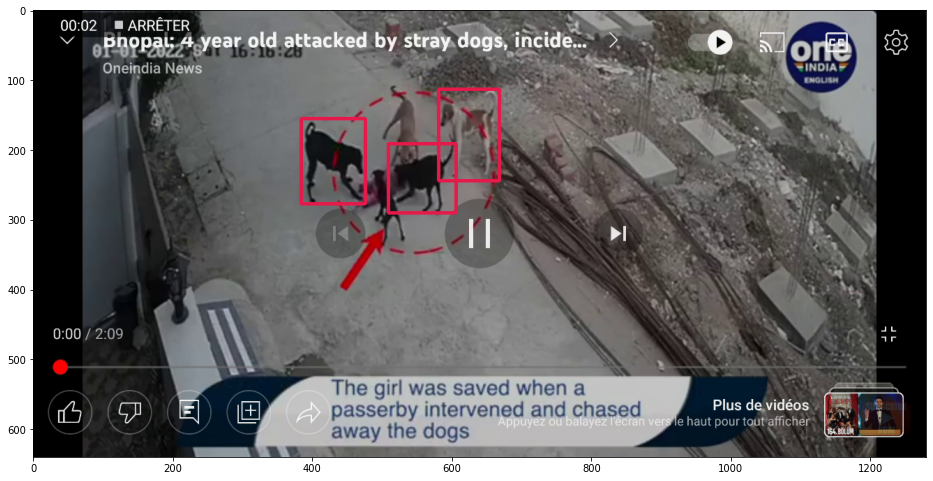

In [ ]:
SOURCE_VIDEO_PATH = "/content/drive/MyDrive/TestDerniere.mp4"
# create frame generator
generator = get_video_frames_generator(SOURCE_VIDEO_PATH)
# create instance of BoxAnnotator
box_annotator = BoxAnnotator(color=ColorPalette(), thickness=3, text_thickness=3, text_scale=1)
# acquire first video frame
iterator = iter(generator)
frame = next(iterator)
# model prediction on single frame and conversion to supervision Detections
results = model(frame)
detections = Detections(
    xyxy=results[0].boxes.xyxy.cpu().numpy(),
    confidence=results[0].boxes.conf.cpu().numpy(),
    class_id=results[0].boxes.cls.cpu().numpy().astype(int)
)
# format custom labels
labels = [
    f"{CLASS_NAMES_DICT[class_id]} {confidence:0.2f}"
    for _, confidence, class_id, tracker_id
    in detections
]
# annotate and display frame
frame = box_annotator.annotate(frame=frame, detections=detections, labels=labels)
show_frame_in_notebook(frame, (16, 16))

Optional  adding a line for counting

In [ ]:
# settings

SOURCE_VIDEO_PATH = "/content/drive/MyDrive/TestDerniere.mp4"
TARGET_VIDEO_PATH = f"/content/drive/MyDrive/TestDerniere40epochF.mp4"

In [ ]:
from tqdm.notebook import tqdm
import math

# create BYTETracker instance
byte_tracker = BYTETracker(BYTETrackerArgs())
# create VideoInfo instance
video_info = VideoInfo.from_video_path(SOURCE_VIDEO_PATH)
# create frame generator
generator = get_video_frames_generator(SOURCE_VIDEO_PATH)
# create LineCounter instance
# line_counter = LineCounter(start=LINE_START, end=LINE_END)
# create instance of BoxAnnotator and LineCounterAnnotator
box_annotator = BoxAnnotator(color=ColorPalette(), thickness=4, text_thickness=4, text_scale=2)
# line_annotator = LineCounterAnnotator(thickness=4, text_thickness=4, text_scale=2)

#Declaring our list of dogs and frame number
i = 0
dogs_list = [[]]
boxes_sizes = []
# open target video file
with VideoSink(TARGET_VIDEO_PATH, video_info) as sink:
    # loop over video frames
    for frame in tqdm(generator, total=video_info.total_frames):
        # model prediction on single frame and conversion to supervision Detections
        results = model(frame)
        dogs_count = [len(results[0].boxes.xyxy), i]
        for j in range(0,(len(results[0].boxes.xyxy)-1)):
          bounding_box = results[0].boxes.xyxy
          #calculating the surface area of our bounding boxes and appending them to a list
        #  box_size = math.sqrt(((bounding_box[j][0]-bounding_box[j][2]))**2) * math.sqrt(((bounding_box[j][1]-bounding_box[j][3]))**2)
          box_size = abs(bounding_box[j][0]-bounding_box[j][2]) * abs(bounding_box[j][1]-bounding_box[j][3])
          boxes_sizes.append(box_size)


        dogs_list.append(dogs_count)
        #print("Dogs count in frame "+ str(i) + " are : " + str(dogs_count))
        i = i+1
        detections = Detections(
            xyxy=results[0].boxes.xyxy.cpu().numpy(),
            confidence=results[0].boxes.conf.cpu().numpy(),
            class_id=results[0].boxes.cls.cpu().numpy().astype(int)

        )

        # filtering out detections with unwanted classes
        mask = np.array([class_id in CLASS_ID for class_id in detections.class_id], dtype=bool)
        detections.filter(mask=mask, inplace=True)
        # tracking detections
        tracks = byte_tracker.update(
            output_results=detections2boxes(detections=detections),
            img_info=frame.shape,
            img_size=frame.shape
        )
        tracker_id = match_detections_with_tracks(detections=detections, tracks=tracks)
        detections.tracker_id = np.array(tracker_id)
        # filtering out detections without trackers
        mask = np.array([tracker_id is not None for tracker_id in detections.tracker_id], dtype=bool)
        detections.filter(mask=mask, inplace=True)
        # format custom labels
        labels = [
            f"#{CLASS_NAMES_DICT[class_id]} {confidence:0.2f}"
            for _, confidence, class_id, tracker_id
            in detections
        ]
        # updating line counter
       # line_counter.update(detections=detections)
        # annotate and display frame
        frame = box_annotator.annotate(frame=frame, detections=detections, labels=labels)
        #line_annotator.annotate(frame=frame, line_counter=line_counter)
        sink.write_frame(frame)

  0%|          | 0/543 [00:00<?, ?it/s]

In [ ]:
dogs_count = []
x = 0
all_boxes = []
dogs_list.pop(0)
#Getting only the Dog Count for each frame
for m in range(0, len(dogs_list)):
  x = dogs_list[m][0]
  dogs_count.append(x)
# Dogs Max, Min and Mean
max_dogs = max(dogs_count)
min_dogs = min(dogs_count)
dogs_mean = sum(dogs_count)/len(dogs_list)
# Dogs box sizes, Min, Max and Mean
# boxes_sizes.pop(0)
# for m in range(0,len(boxes_sizes)):
#   for j in range(0, len(boxes_sizes[m])):
#     all_boxes.append(boxes_sizes[m][j])

box_max = max(boxes_sizes)
box_min = min(boxes_sizes)
box_mean = sum(boxes_sizes)/len(boxes_sizes)
print("Dogs Stats: ")
print("max dogs detected is " + str(max_dogs))
print("min dogs detected is " + str(min_dogs))
print("Mean dogs detected is " + str(dogs_mean))

print("Boxes stats: ")
print("max box size detected is " + str(box_max))
print("min box size detected is " + str(box_min))
print("Mean box size detected is " + str(box_mean))

Dogs Stats: 
max dogs detected is 8
min dogs detected is 0
Mean dogs detected is 3.0313075506445673
Boxes stats: 
max box size detected is tensor(29893., device='cuda:0')
min box size detected is tensor(650., device='cuda:0')
Mean box size detected is tensor(9454.49707, device='cuda:0')
